**Background & Context:**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards   

**Objective**
* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

**Data Dictionary**
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

## Index
- <a href = #link1>Overview of the dataset</a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Insights Based on EDA</a>


- <a href = #link4>Outlier Detection & Treatment</a>


- <a href = #link5>Missing value Detection & Treatment</a>


- <a href = #link6>Split the dataset</a>


- <a href = #link7>Missing value Imputation using KNN Imputer</a>


- <a href = #link8> Model Building Logistic Regression </a> 


- <a href = #link9> Model Performance Improvement-Upsampling </a> 


- <a href = #link10> Model Performance Improvement-Regularization </a> 


- <a href = #link11> Model Performance Improvement-Downsampling </a> 


- <a href = #link12> Model Comparision-Logistic Regression </a> 


- <a href = #link13> Model Building Bagging & Boosting</a>


- <a href = #link14>Hyperparameter tuning using Grid search & Random search for all models</a>


- <a href = #link15>Model Comparison-Bagging & Boosting</a>


- <a href = #link16>Feature Importance</a>


- <a href = #link17>Business Recommendations & Insights</a>

## <a id = "link1"></a> Overview of the dataset

### Import necessary Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Library to impute missing values
from sklearn.impute import KNNImputer
# Library to build pipeline
from sklearn.pipeline import Pipeline, make_pipeline
# Library to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier
# Library to supress the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
Credit_data = pd.read_csv('BankChurners.csv')# reading the data from the csv file

In [3]:
# copying data to another varaible to avoid any changes to original data
df=Credit_data.copy()

#### View the first 5 and last 5 rows of the data set

In [4]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [5]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

#### Understand the shape of the dataset

In [6]:
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 10127 rows and 21 columns.


#### Check the Datatypes and columns of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* We dont see any missing values in the columns
* There are 10 int variables,5 float variables and 6 object variables

#### Summary of the dataset

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)# to round off the values to 5 decimals

In [9]:
df.describe().T

count            mean            std  \
CLIENTNUM                10127.00000 739177606.33366 36903783.45023   
Customer_Age             10127.00000        46.32596        8.01681   
Dependent_count          10127.00000         2.34620        1.29891   
Months_on_book           10127.00000        35.92841        7.98642   
Total_Relationship_Count 10127.00000         3.81258        1.55441   
Months_Inactive_12_mon   10127.00000         2.34117        1.01062   
Contacts_Count_12_mon    10127.00000         2.45532        1.10623   
Credit_Limit             10127.00000      8631.95370     9088.77665   
Total_Revolving_Bal      10127.00000      1162.81406      814.98734   
Avg_Open_To_Buy          10127.00000      7469.13964     9090.68532   
Total_Amt_Chng_Q4_Q1     10127.00000         0.75994        0.21921   
Total_Trans_Amt          10127.00000      4404.08630     3397.12925   
Total_Trans_Ct           10127.00000        64.85869       23.47257   
Total_Ct_Chng_Q4_Q1      10127.00000         0.71222        0.23809   
Avg_Utilization_Ratio    10127.00000         0.27489        0.27569   

                                     min             25%             50%  \
CLIENTNUM                708082083.00000 713036770.50000 717926358.00000   
Customer_Age                    26.00000        41.00000        46.00000   
Dependent_count                  0.00000         1.00000         2.00000   
Months_on_book                  13.00000        31.00000        36.00000   
Total_Relationship_Count         1.00000         3.00000         4.00000   
Months_Inactive_12_mon           0.00000         2.00000         2.00000   
Contacts_Count_12_mon            0.00000         2.00000         2.00000   
Credit_Limit                  1438.30000      2555.00000      4549.00000   
Total_Revolving_Bal              0.00000       359.00000      1276.00000   
Avg_Open_To_Buy                  3.00000      1324.50000      3474.00000   
Total_Amt_Chng_Q4_Q1             0.00000         0.63100         0.73600   
Total_Trans_Amt                510.00000      2155.50000      3899.00000   
Total_Trans_Ct                  10.00000        45.00000        67.00000   
Total_Ct_Chng_Q4_Q1              0.00000         0.58200         0.70200   
Avg_Utilization_Ratio            0.00000         0.02300         0.17600   

                                     75%             max  
CLIENTNUM                773143533.00000 828343083.00000  
Customer_Age                    52.00000        73.00000  
Dependent_count                  3.00000         5.00000  
Months_on_book                  40.00000        56.00000  
Total_Relationship_Count         5.00000         6.00000  
Months_Inactive_12_mon           3.00000         6.00000  
Contacts_Count_12_mon            3.00000         6.00000  
Credit_Limit                 11067.50000     34516.00000  
Total_Revolving_Bal           1784.00000      2517.00000  
Avg_Open_To_Buy               9859.00000     34516.00000  
Total_Amt_Chng_Q4_Q1             0.85900         3.39700  
Total_Trans_Amt               4741.00000     18484.00000  
Total_Trans_Ct                  81.00000       139.00000  
Total_Ct_Chng_Q4_Q1              0.81800         3.71400  
Avg_Utilization_Ratio            0.50300         0.99900

* CLIENTNUM:The client number being a unique identifier does not add value to the analysis and can be dropped.
* Age of customers range from 26 to 73
* Customers have min 13 years of relationship with the Bank
* The max number of products held is 6
* Credit limit ranges from 1438 to 34516
* Avg_open_to_buy has a huge range from amount 3 to 34516

In [10]:
df.drop(['CLIENTNUM'],axis=1,inplace=True)

In [11]:
df.describe(include ='object').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

* Most of the customers are existing customers who has not attritted yet
* Most of the customers are Female ,have graduation and are married
* Most of the customers make less than 40K income
* The card category that most customers hold is Blue.
* **Attrition_Flag is our target variable**

#### Fixing the Datatypes

In [12]:
#selecting columns with datatype as object
cols = df.select_dtypes(['object'])
cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [13]:
#Converting object datatype to category
for i in cols.columns:
    df[i] = df[i].astype('category')

In [14]:
#Other columns that can be converted to category type
cols_to_convert = df[['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']]
cols_to_convert.columns

Index(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon'],
      dtype='object')

In [15]:
#converting above columns to category
for i in cols_to_convert.columns:
    df[i] = df[i].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

##  <a id = "link2"></a> EDA

#### Univariate Analysis

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Observations on Customer_Age

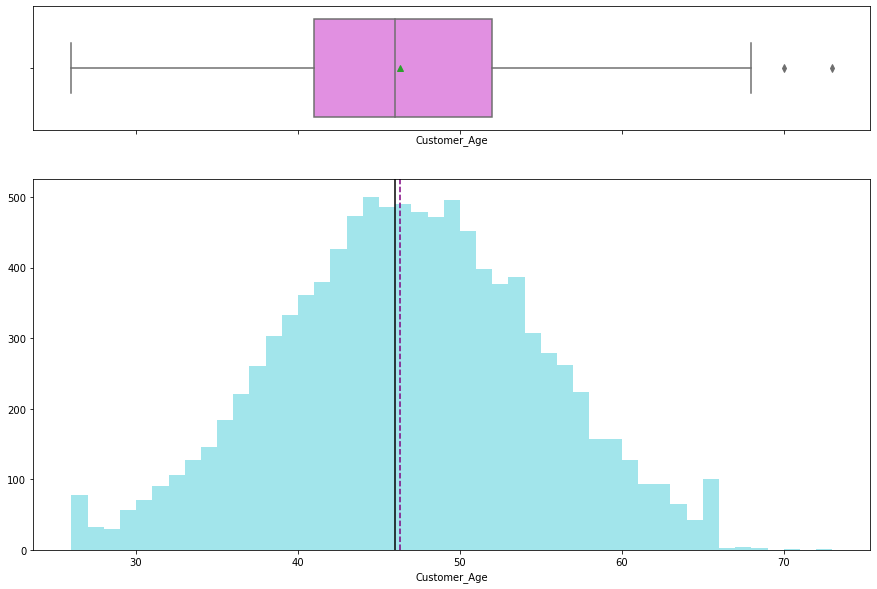

In [18]:
histogram_boxplot(df['Customer_Age'])

* Age is almost normally distributed
* We can see couple of outliers where age >70

#### Observations on Months_on_book

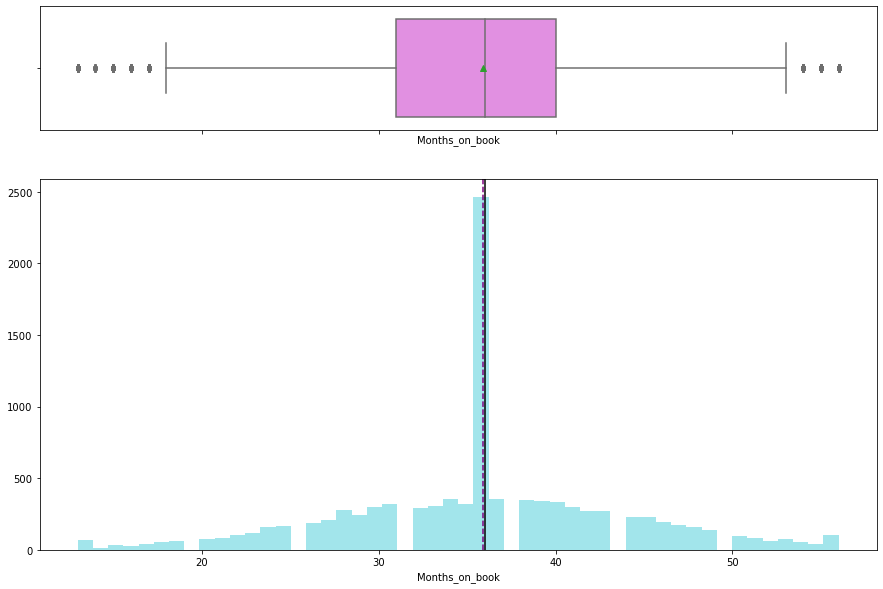

In [19]:
histogram_boxplot(df['Months_on_book'])

* The mean and median value is same at 36
* We can see some outliers where months < 15 and months > 50

#### Observations on Credit_Limit

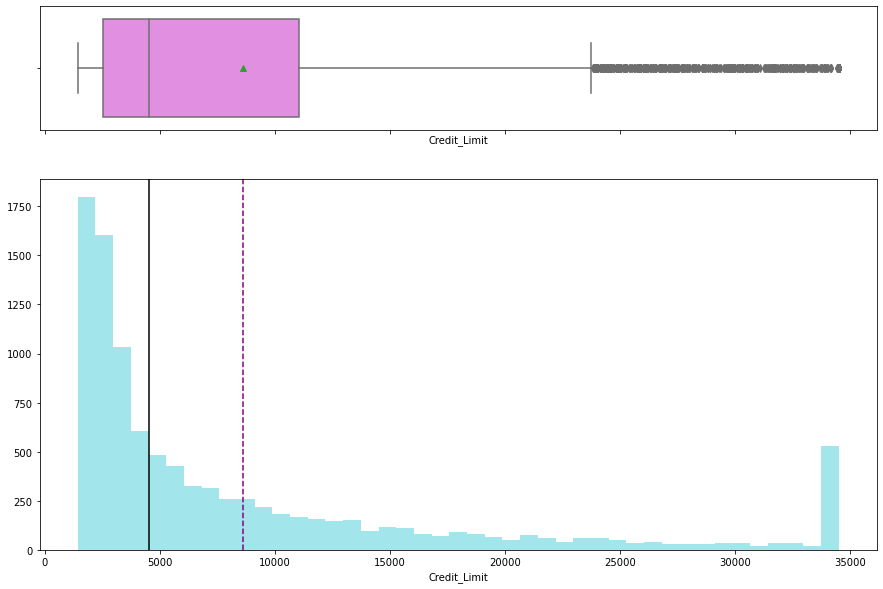

In [20]:
histogram_boxplot(df['Credit_Limit'])

* Credit_Limit is left skewed.
* We can see that credit limit greater than 25000 are outliers

#### Observations on Total_Revolving_Bal

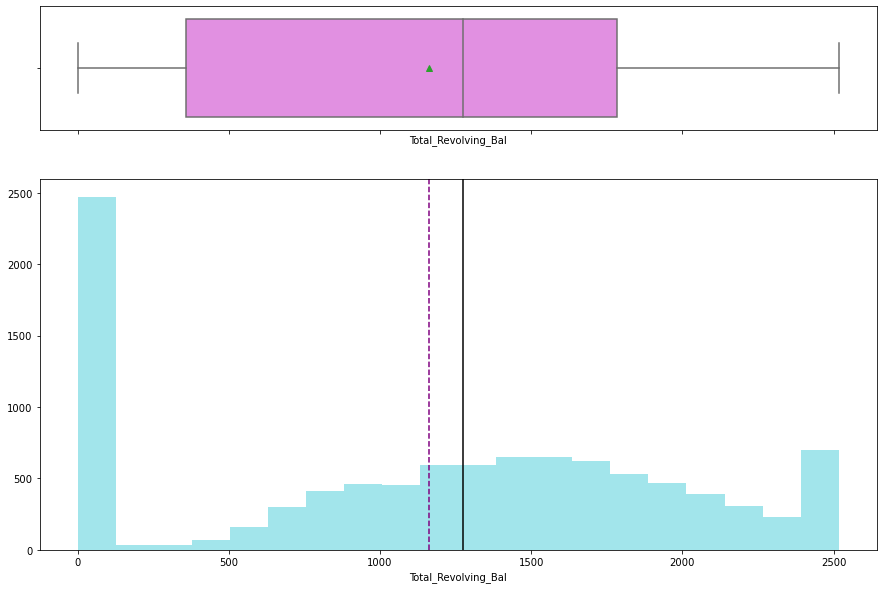

In [21]:
histogram_boxplot(df['Total_Revolving_Bal'])

* Total_Revolving_Bal is left skewed
* Most of the customers had a revolving balance of 0

#### Observations on Avg_Open_To_Buy 

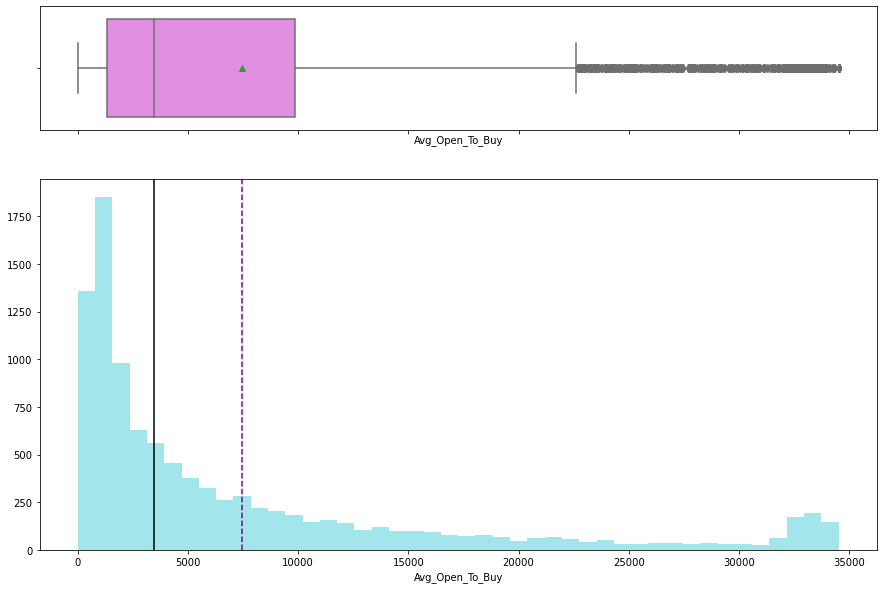

In [22]:
histogram_boxplot(df['Avg_Open_To_Buy'])

* The distribution is right skewed
* The amount left to use in the credit line is showing outliers for amount greater than about 230000

#### Observations on Total_Amt_Chng_Q4_Q1

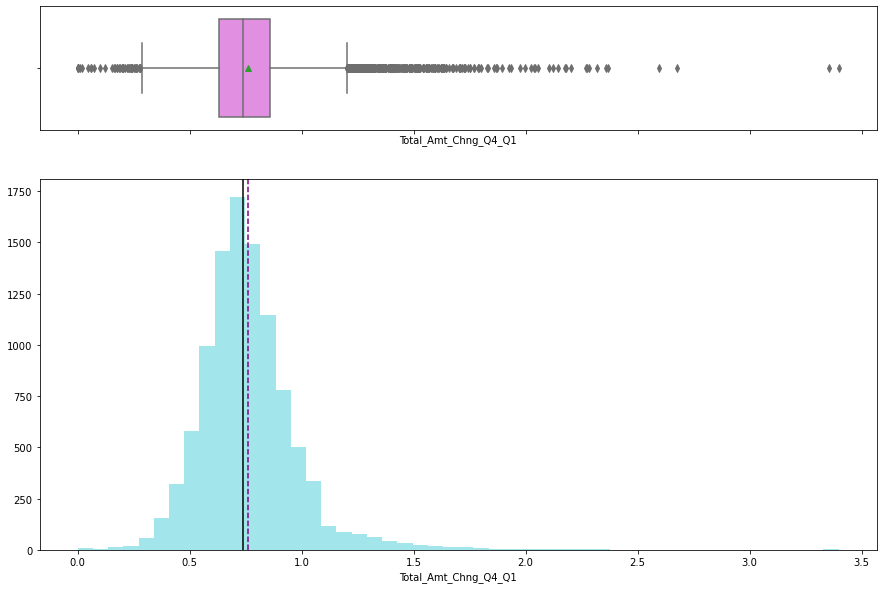

In [23]:
histogram_boxplot(df['Total_Amt_Chng_Q4_Q1'])

* We can outliers greater than 1.2 and less than 0.3.We have an almost normal distribution

#### Observations on Total_Trans_Amt  

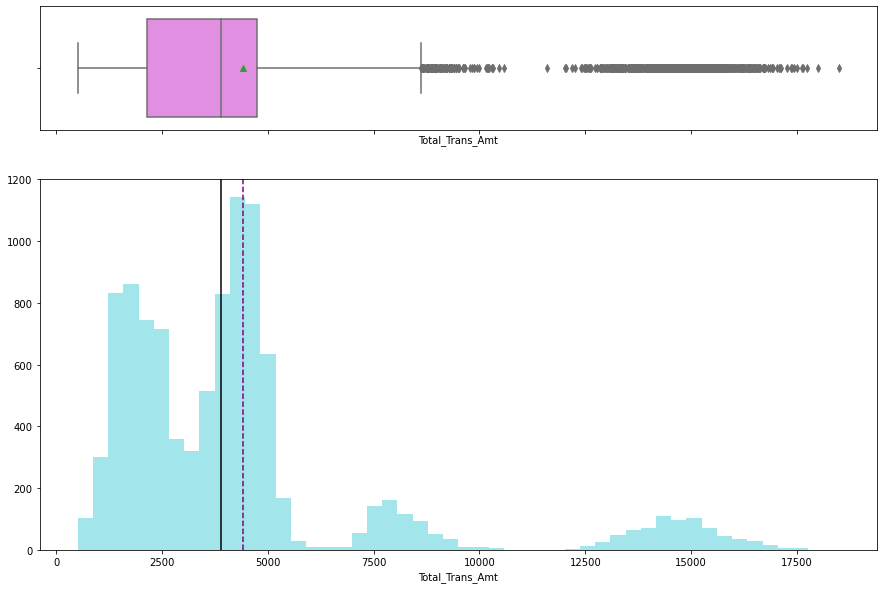

In [24]:
histogram_boxplot(df['Total_Trans_Amt'])

* The mean is at about 4500 for Total_Trans_Amt and we have outliers above 8500

#### Observations on Total_Trans_Ct

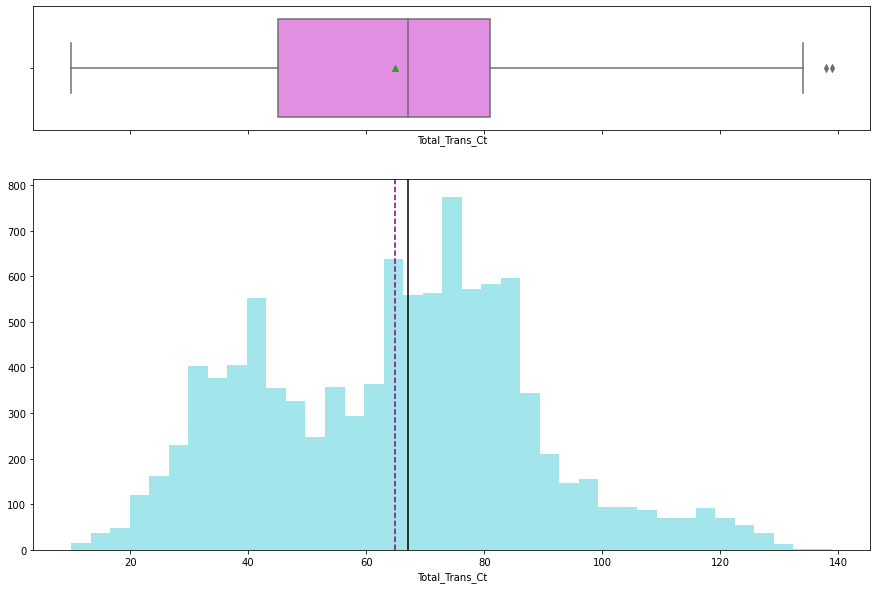

In [25]:
histogram_boxplot(df['Total_Trans_Ct'])

* Total_Trans_Ct has a median value of 67.We have couple of outliers greater than 135

#### Observations on Total_Ct_Chng_Q4_Q1

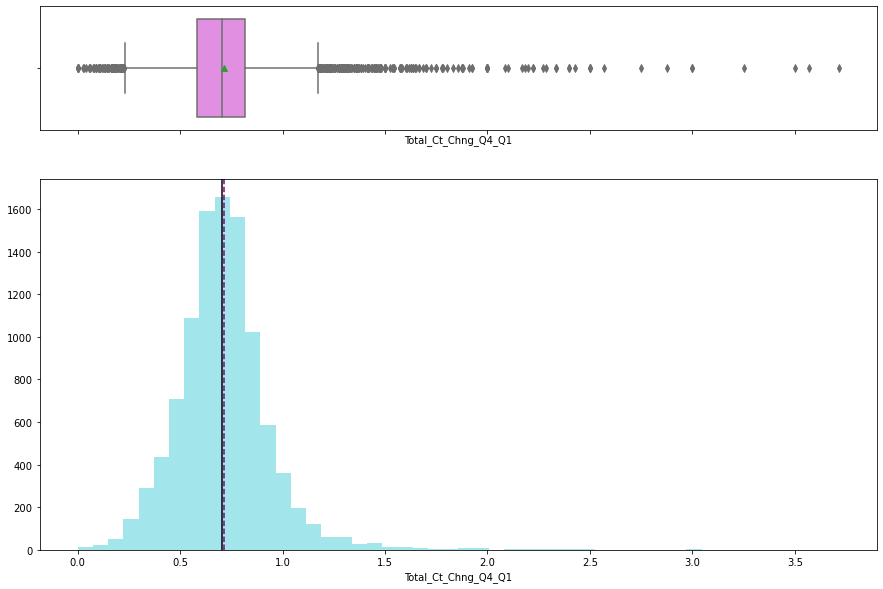

In [26]:
histogram_boxplot(df['Total_Ct_Chng_Q4_Q1'])

* IQR is between 0.55 and 0.8  there are outliers above 1.2 and below 0.25.
* We have a normal distribution

#### Observations on Avg_Utilization_Ratio

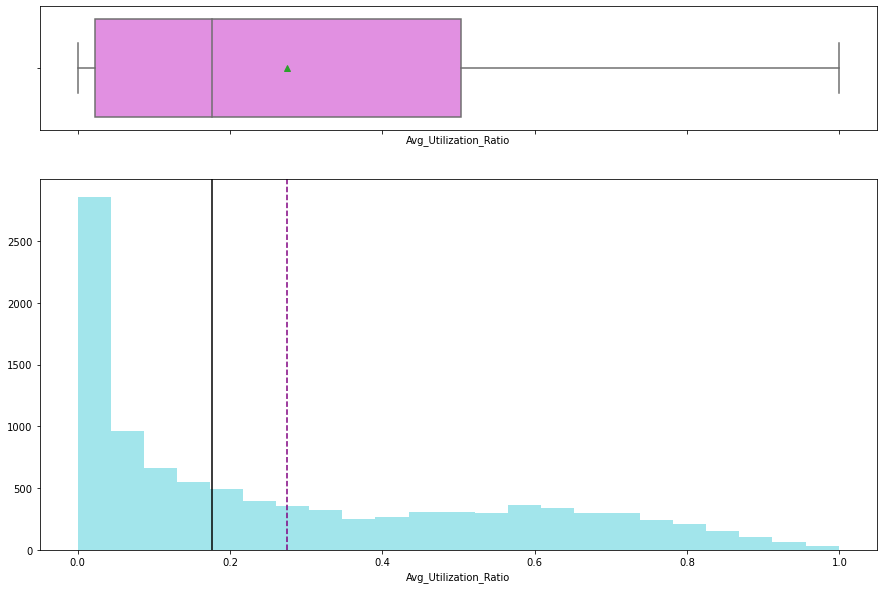

In [27]:
histogram_boxplot(df['Avg_Utilization_Ratio'])

* The distribution is left skewed with median of about 0.18

In [28]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### Observations on Attrition_Flag

In [29]:
perc_on_bar('Attrition_Flag')

* 16.1% of customers has attrited and 83.9% are exisitng customers

#### Observations on Gender

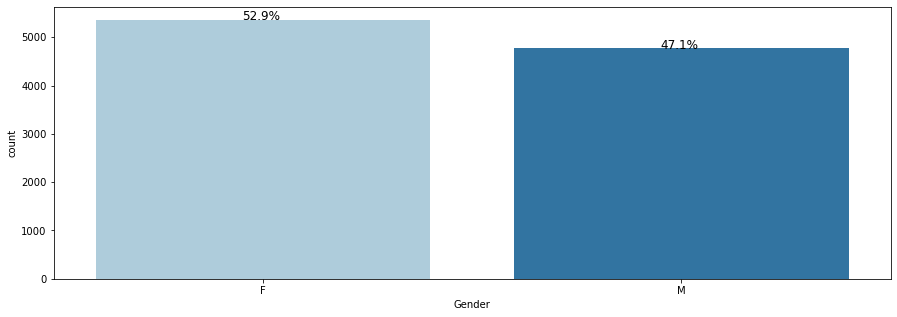

In [30]:
perc_on_bar('Gender')

52.9% are Females and 47.1 % are Males

#### Observations on Dependent_count 

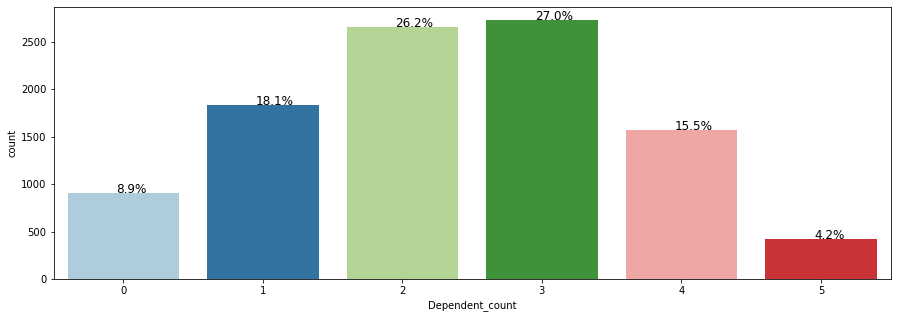

In [31]:
perc_on_bar('Dependent_count')

27% of customers have 3 dependents,26.2% have 2 dependents and 18.1% has 1 dependent

#### Observations on Education_Level

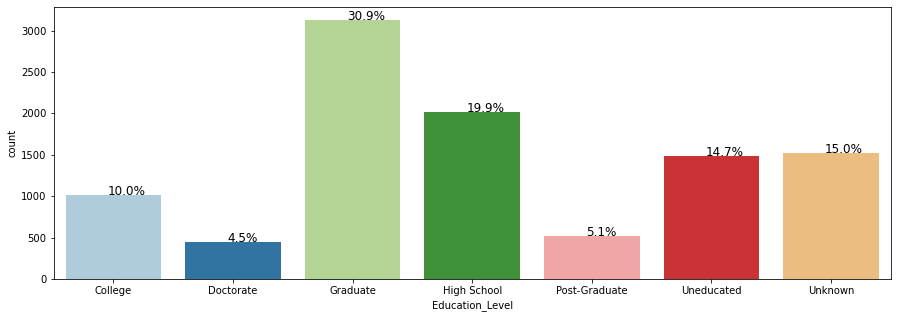

In [32]:
perc_on_bar('Education_Level')

30.9% customers are graduates followed by 19.9% who has High School education.
We have 15% showing as Unknown .We need to consider this as missing value and treat it later

#### Observations on Marital_Status

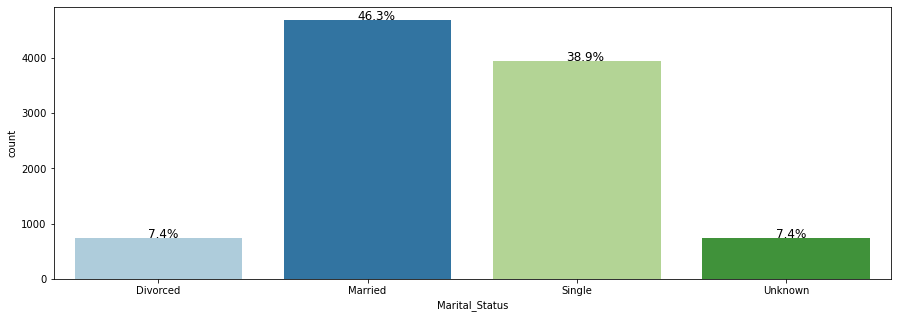

In [33]:
perc_on_bar('Marital_Status')

* We have 46.3% of customers who are married.38.9% Single nad 7.4% Divorced.
* We see 7.4% of customers who are unknown .Will treat them as missing

#### Observations on Income_Category

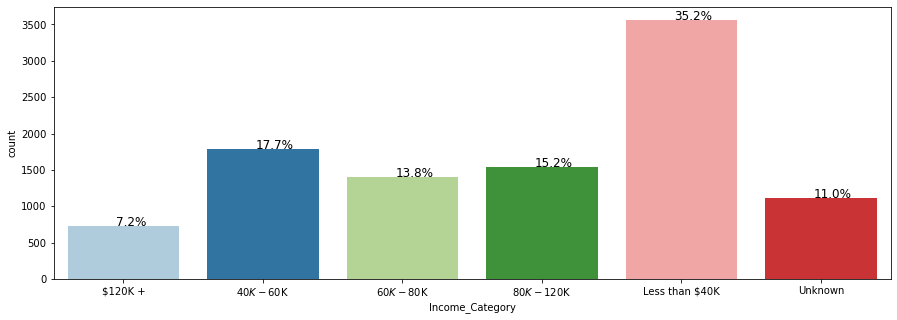

In [34]:
perc_on_bar('Income_Category')

* 35.2% percent customers make less than $40K,followed by 17.7% who make 40K-60K. 
* Here also we have 11% unknowns which needs to be treated as missing values

#### Observations on Card_Category

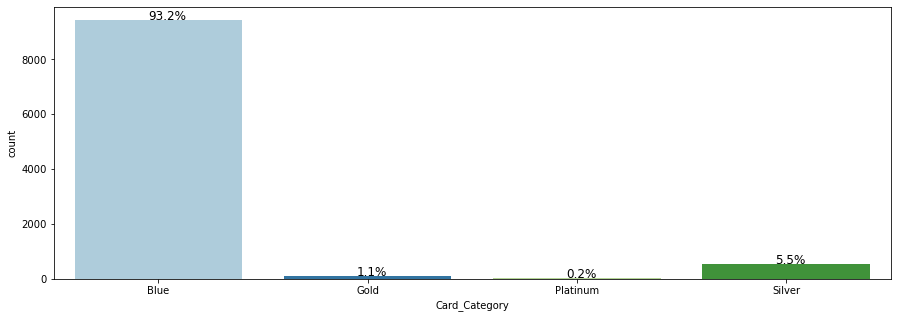

In [35]:
perc_on_bar('Card_Category')

93.2% customers have Blue card.Only very few customers have the other card types

#### Observations on Total_Relationship_Count

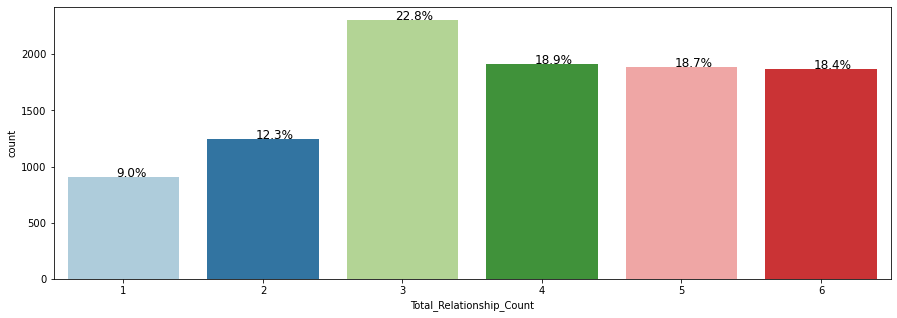

In [36]:
perc_on_bar('Total_Relationship_Count')

22.8% customers hold 3 products with the bank About 18% each hold 4 products and 5 and 6 products 

#### Observations on Months_Inactive_12_mon 

perc_on_bar('Months_Inactive_12_mon')

* 38.0% customers had their card inactive for 3 months followed by 32.4% who had not used their card for 2 months.
* 1.2% have not used their card for 6 months

#### Observations on Contacts_Count_12_mon

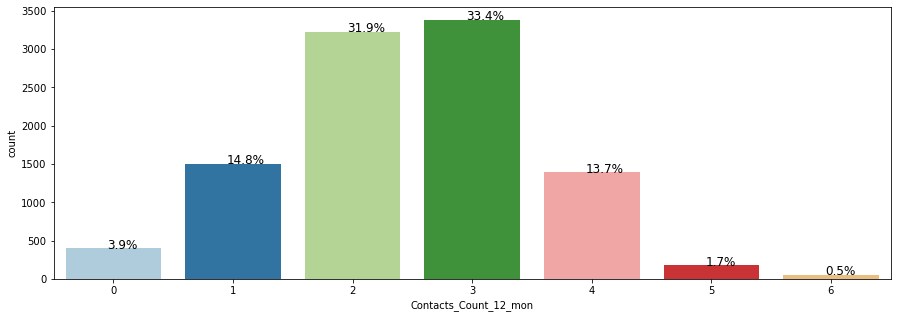

In [37]:
perc_on_bar('Contacts_Count_12_mon')

33.4% of the customers had contacted the bank or the bank has contacted the customer 3 times in the past 12 months
& 31.9% we contacted 2 times

### Bivariate Analysis

#### Bivariate Analysis of Attrition_Flag with categorical variables

In [38]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['Attrition_Flag'],margins=True).sort_values(by='Attrited Customer',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['Attrition_Flag'],normalize='index').sort_values(by='Attrited Customer',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


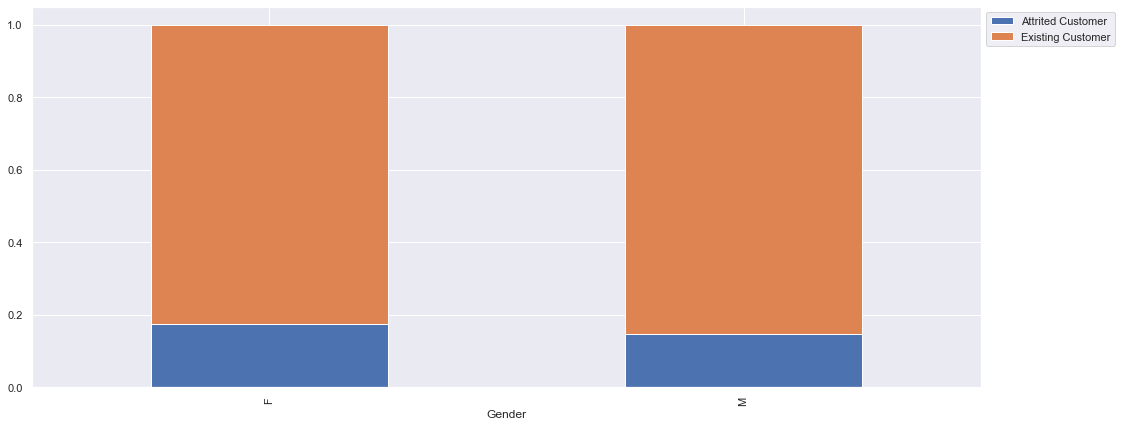

In [39]:
stacked_plot(df['Gender'])

More Female customers have attrited than Male customers

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


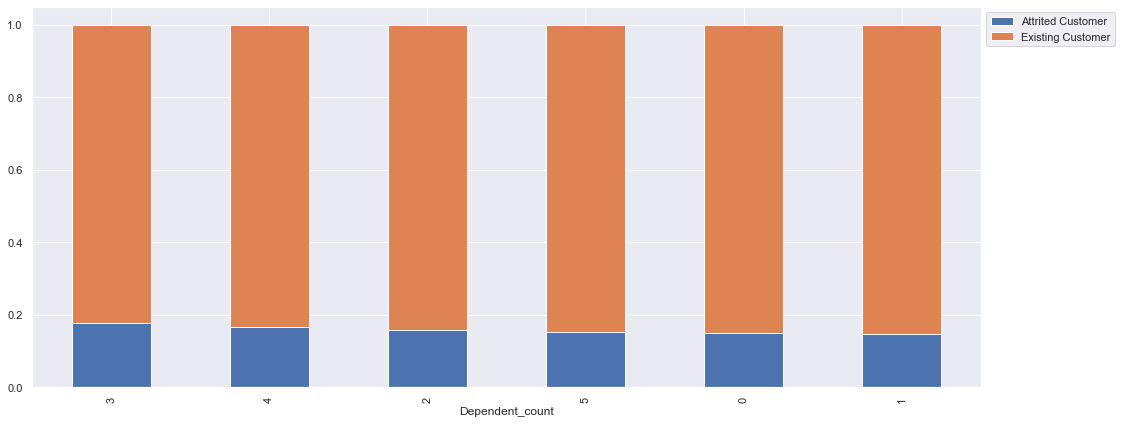

In [40]:
stacked_plot(df['Dependent_count'])

We can see slightly more attrition for customers who have 3 or 4 dependants.The attrition for customers with 0,1,2,5 remains almost the same

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
All                           1627               8500  10127
Graduate                       487               2641   3128
High School                    306               1707   2013
Unknown                        256               1263   1519
Uneducated                     237               1250   1487
College                        154                859   1013
Doctorate                       95                356    451
Post-Graduate                   92                424    516
------------------------------------------------------------------------------------------------------------------------


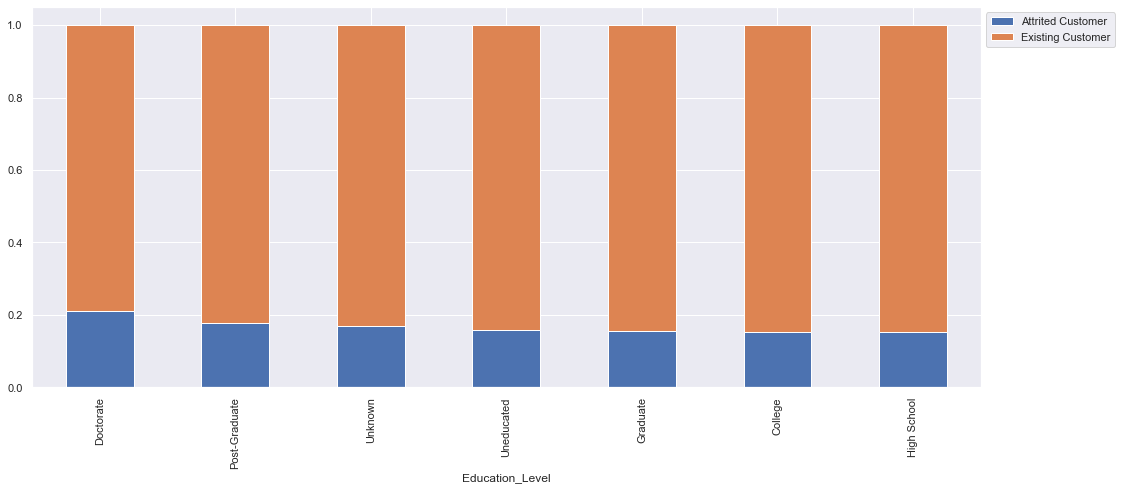

In [41]:
stacked_plot(df['Education_Level'])

* We can see that attrition is higher for customers who have Doctorate degree followed by Post-Graduate degree.
* Customers with Graduate,college,High School and are uneducated have the same level of attrition

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
All                          1627               8500  10127
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
Divorced                      121                627    748
------------------------------------------------------------------------------------------------------------------------


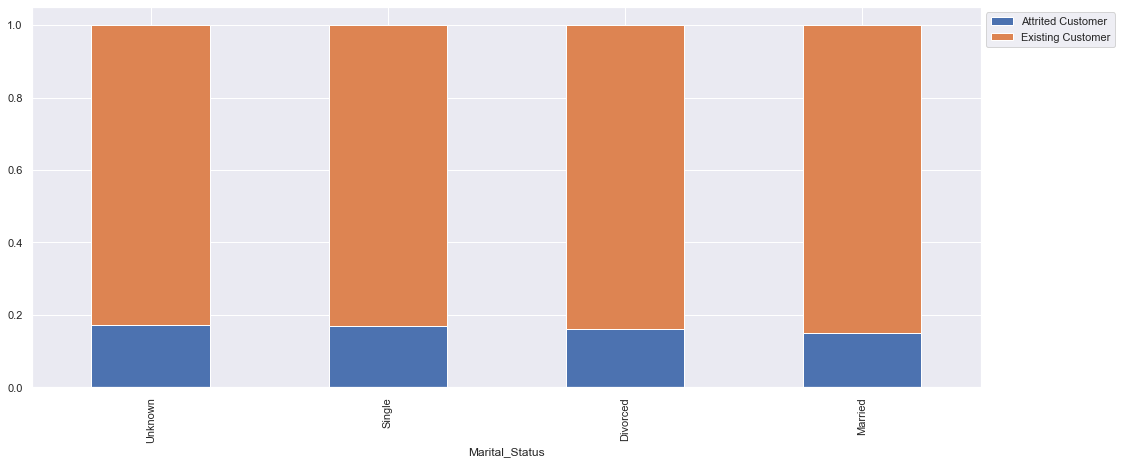

In [42]:
stacked_plot(df['Marital_Status'])

We donot see much difference in attrition between Single,Married,Divorsed customers

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


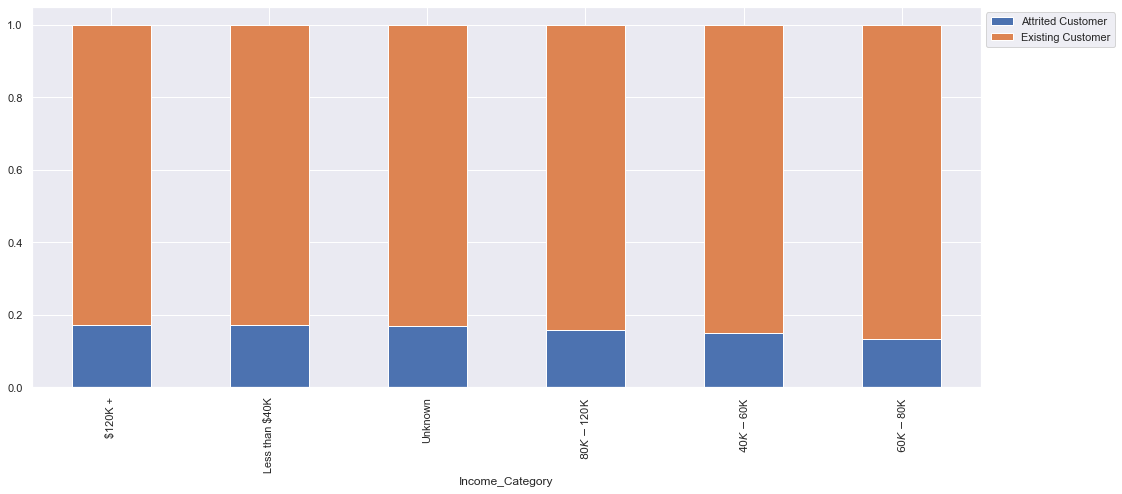

In [43]:
stacked_plot(df['Income_Category'])

* Attrition is slightly more for customers with income Less than 40k but this could also be because majority of customers are in this income category .We would need to analyse this further

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


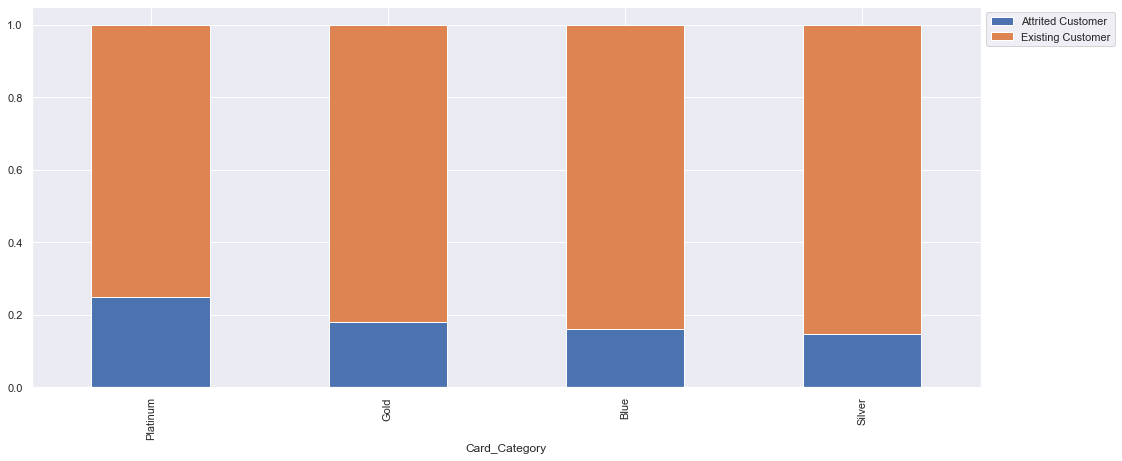

In [44]:
stacked_plot(df['Card_Category'])

* We can see that most of the attrited customers are using Platinum credit card
* Customers using Gold,Blue,Silver cards have the same level of attrition

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


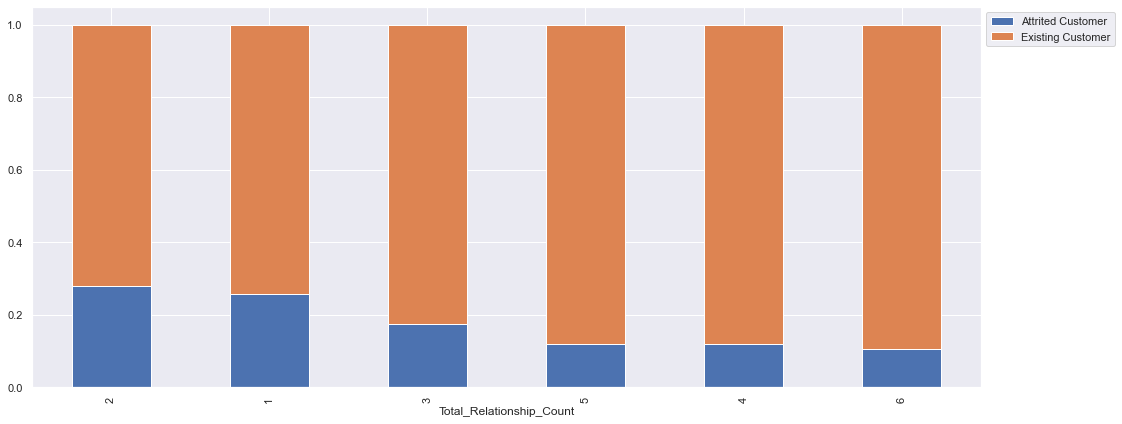

In [45]:
stacked_plot(df['Total_Relationship_Count'])

We can see that attrition is more for customers who hold 1 or 2 products compared to customers who hold more 4 or more products 

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


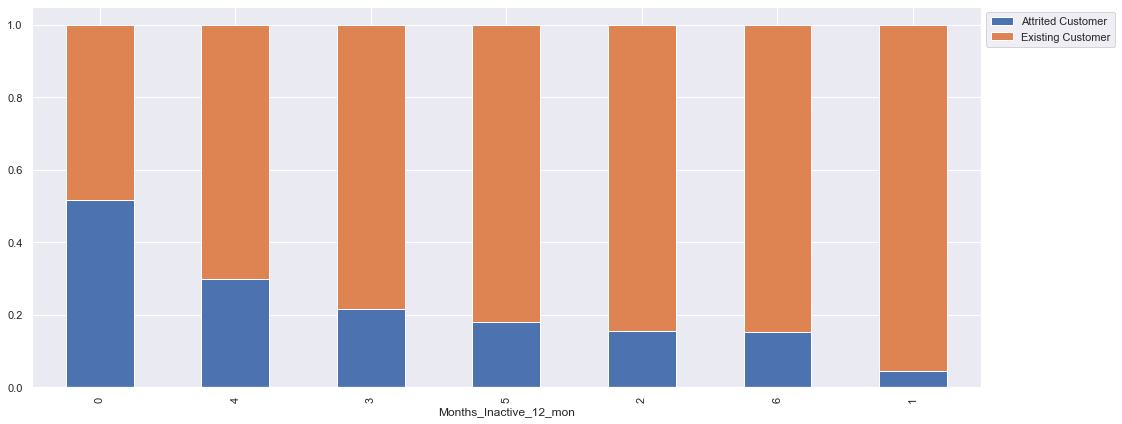

In [46]:
stacked_plot(df['Months_Inactive_12_mon'])

* IneErestingly customers who has not been inactive in the last 12 months are showing the highest attrition.
* Customers who have been inactive for 3 or 4 months are also showing higher attritions

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


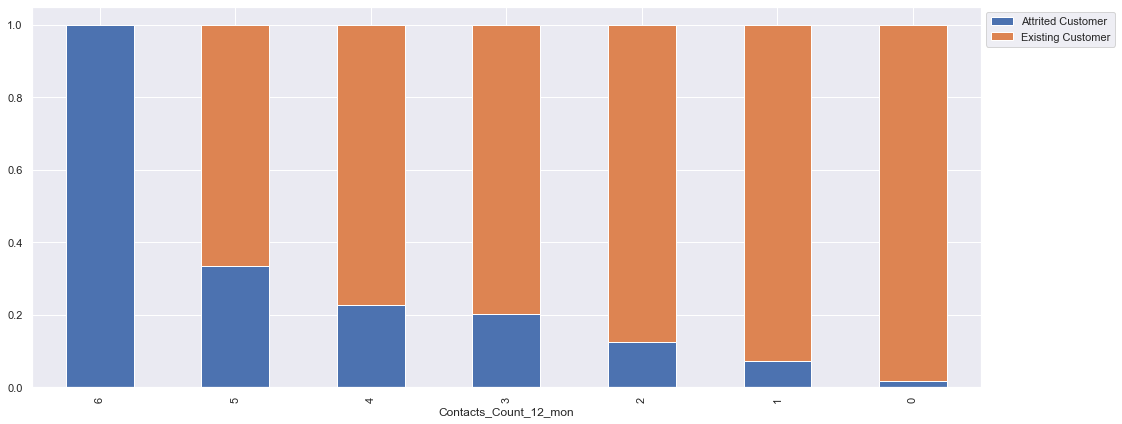

In [47]:
stacked_plot(df['Contacts_Count_12_mon'])

Attrition has been higher when there is higher number of contacts with the Bank in the last 12 months.

#### Bivariate Analysis of Attrition_Flag with continuous variables

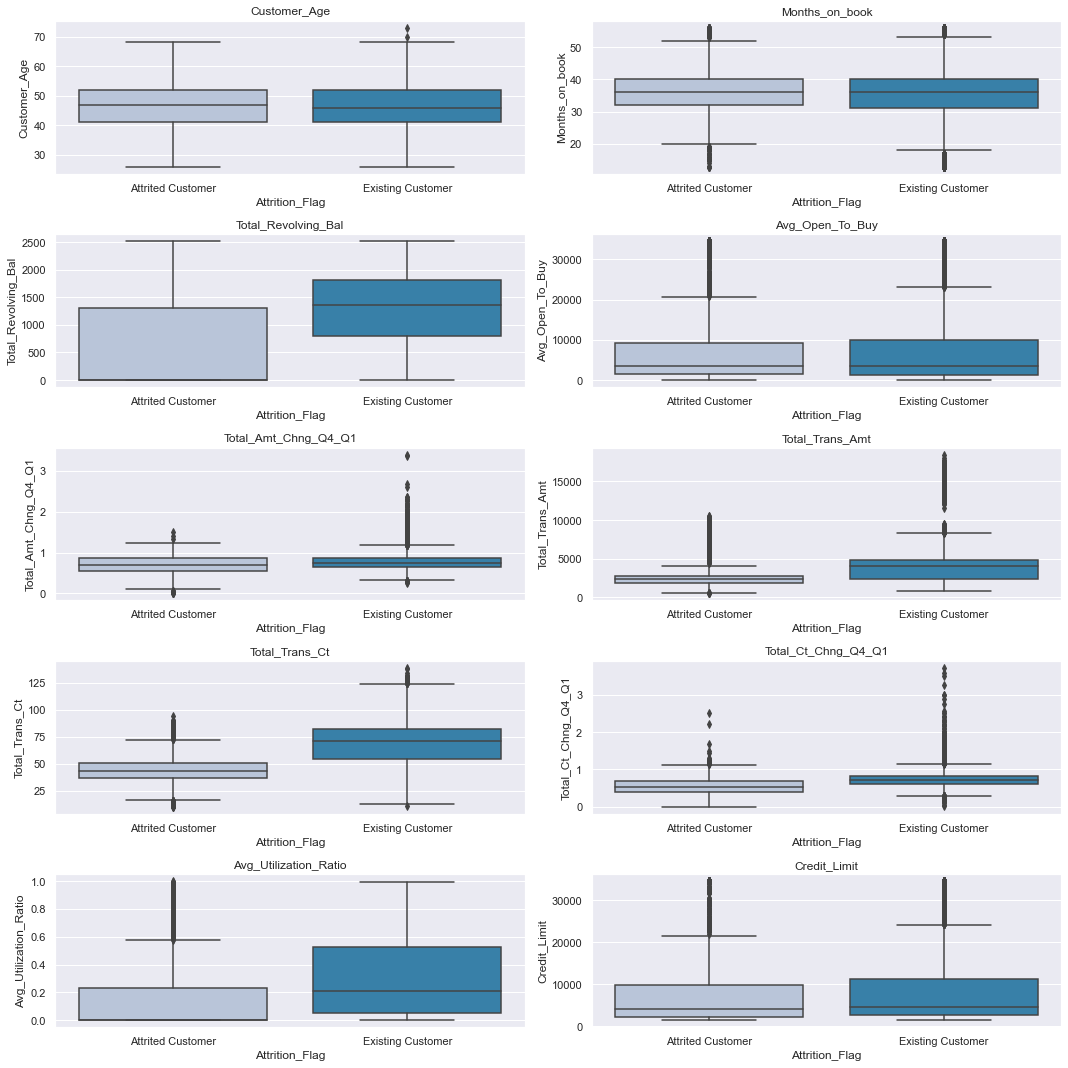

In [48]:
cols = df[['Customer_Age','Months_on_book','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',      
 'Avg_Utilization_Ratio','Credit_Limit']].columns.tolist()
plt.figure(figsize=(15,15))

for i, variable in enumerate(cols):
                     plt.subplot(5,2,i+1)
                     sns.boxplot(df["Attrition_Flag"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* There is not much difference in the Age of customers who have attrited and who are still existing customer
* Most of the Attrited customers have more than 30 and less than 40 months_on_book(Period od relation with Bank). But there is no significant difference between the period of relation with the Bank with exisitng customers and attrited customers
* Attrited customers have low Total_Revolving_Bal compared to existing customers
* There is not much difference in the credit limit(Avg_Open_to_Buy) available to existing and attrited customers.
* Change in transaction amount from Q4 over Q1 (Total_Amt_Chng_Q4_Q1) is less for attrited customers than existing customers
* Total Transaction Amount in the last 12 months is less for attrited customers than existing customers
* There is a big difference in the total transaction count for attrited and existing customers.Attrited customers have less number of transactions compared to existing customers
* Change in transaction count for attrited customers is less than for exisitng customers
* Average utilization ratio for attrited customers is less compared to exisitng customers.

In [49]:
df['Attrition_Flag'] = df.Attrition_Flag.replace(to_replace=['Existing Customer', 'Attrited Customer'], value=[0, 1])

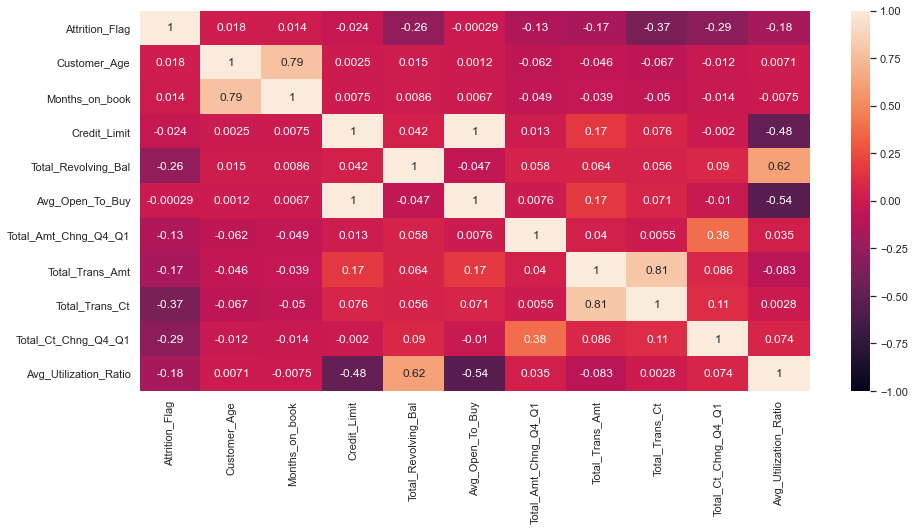

In [50]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

* Attrition Flag has slight positive correlation with Customer Age,Dependent_count & Month_on_book.
* Attrition Flag has slight negative correlation with Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Tran_Ct,Total_Ct_Chng_q4_q1 & Avg_Utilization_Ratio
* There is strong positive correlation between Customer_Age and Months_on_book which implies that customers have long relationship with the bank
* Total_Revolving_Bal has positive correlation with Avg_Utilization_Ratio
* Total_Tran_Amt & Total_Trans_Ct has positive correlation 
* Avg_Utilization_Ratio & Avg_Open_To_Buy has negative correlation

#### Pair Plot

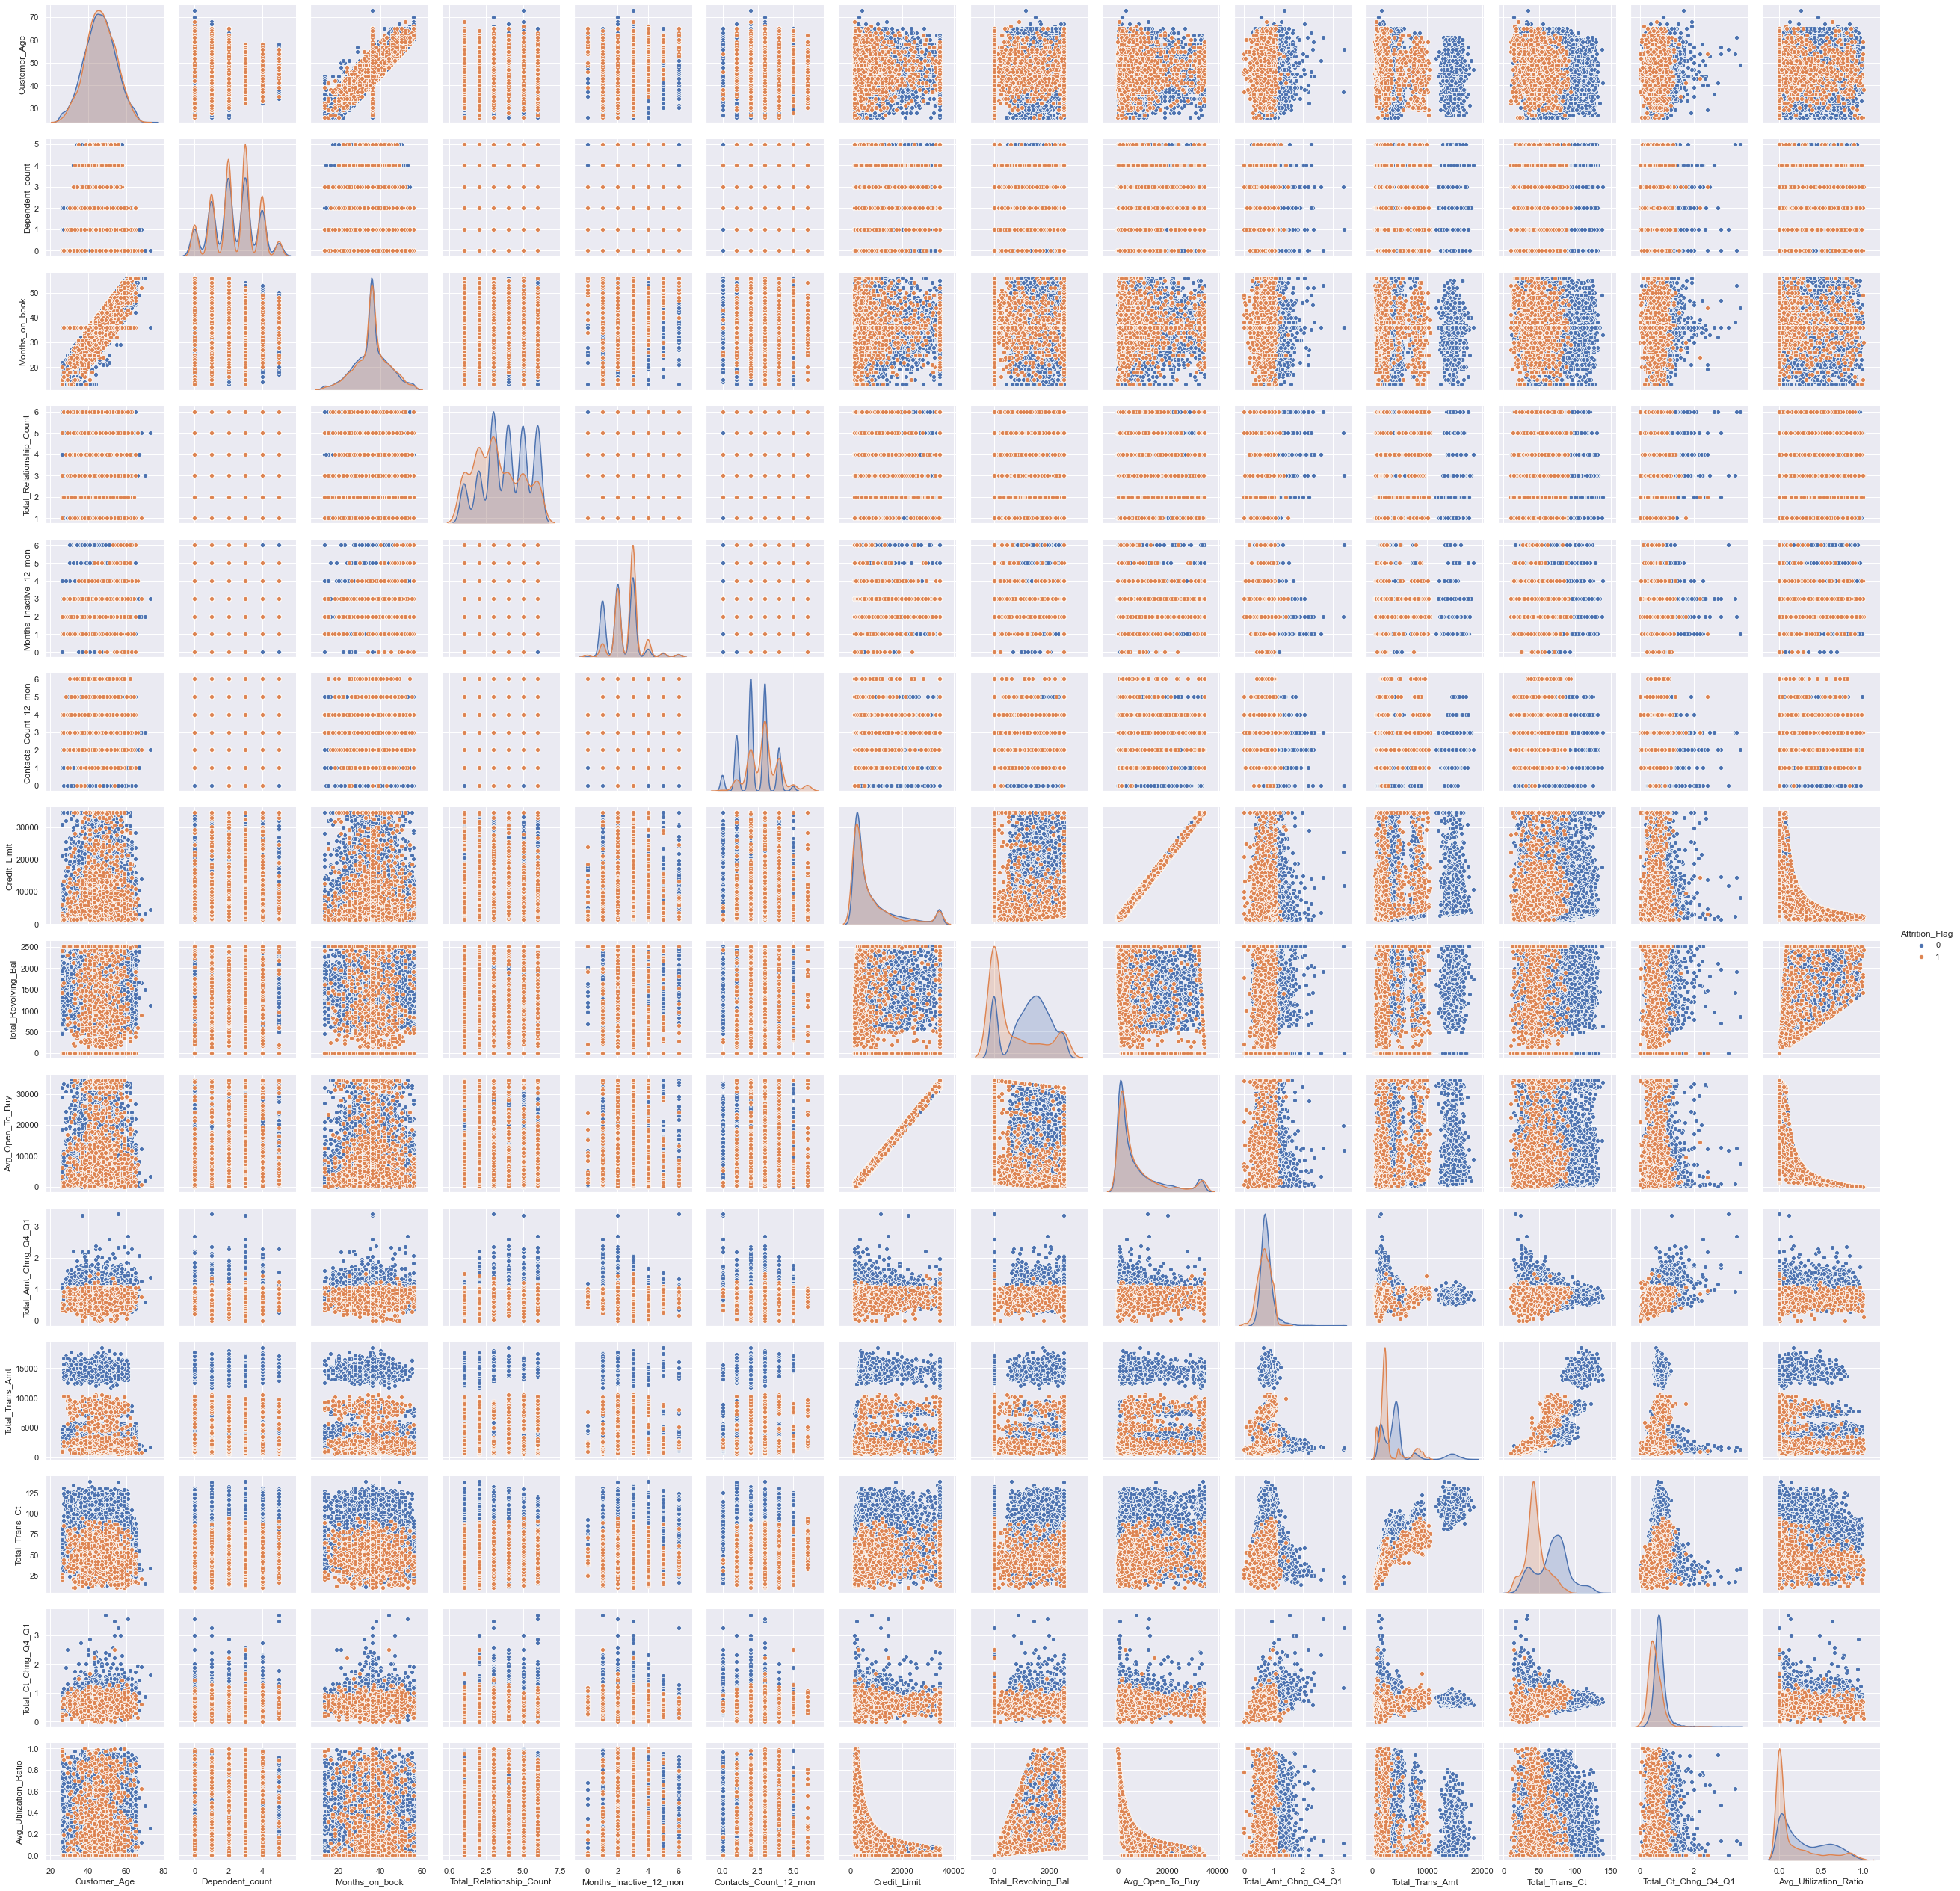

In [51]:
sns.pairplot(df,hue='Attrition_Flag')
plt.show()

We can see positive correlation for Customer_Age and Months_On Book and also positive correlation between Avg_Open_to_Buy and Credit_Limit

## <a id = "link3"></a>  Insights Based On EDA

* Based on our Analysis we have observed that out of the total customers 16.1% has attrited ans 83.9% are existing customers.
* More Female customers have attrited than male customers.
* 93.2% customers hold the Blue card but we can see that most of the attrited customers are using Platinum credit card
* We can see slightly more attrition for customers who have 3 or 4 dependants
* We can see that attrition is higher for customers who have Doctorate degree followed by Post-Graduate degree.
* Attrition is slightly more for customers with income Less than 40k but this could also be because majority of customers are in this income category
* Customers who have been inactive for 3 or 4 months are also showing higher attritions
* Also Attrition has been higher when there is higher number of contacts with the Bank in the last 12 months

## <a id = "link4"></a>Outlier Detection

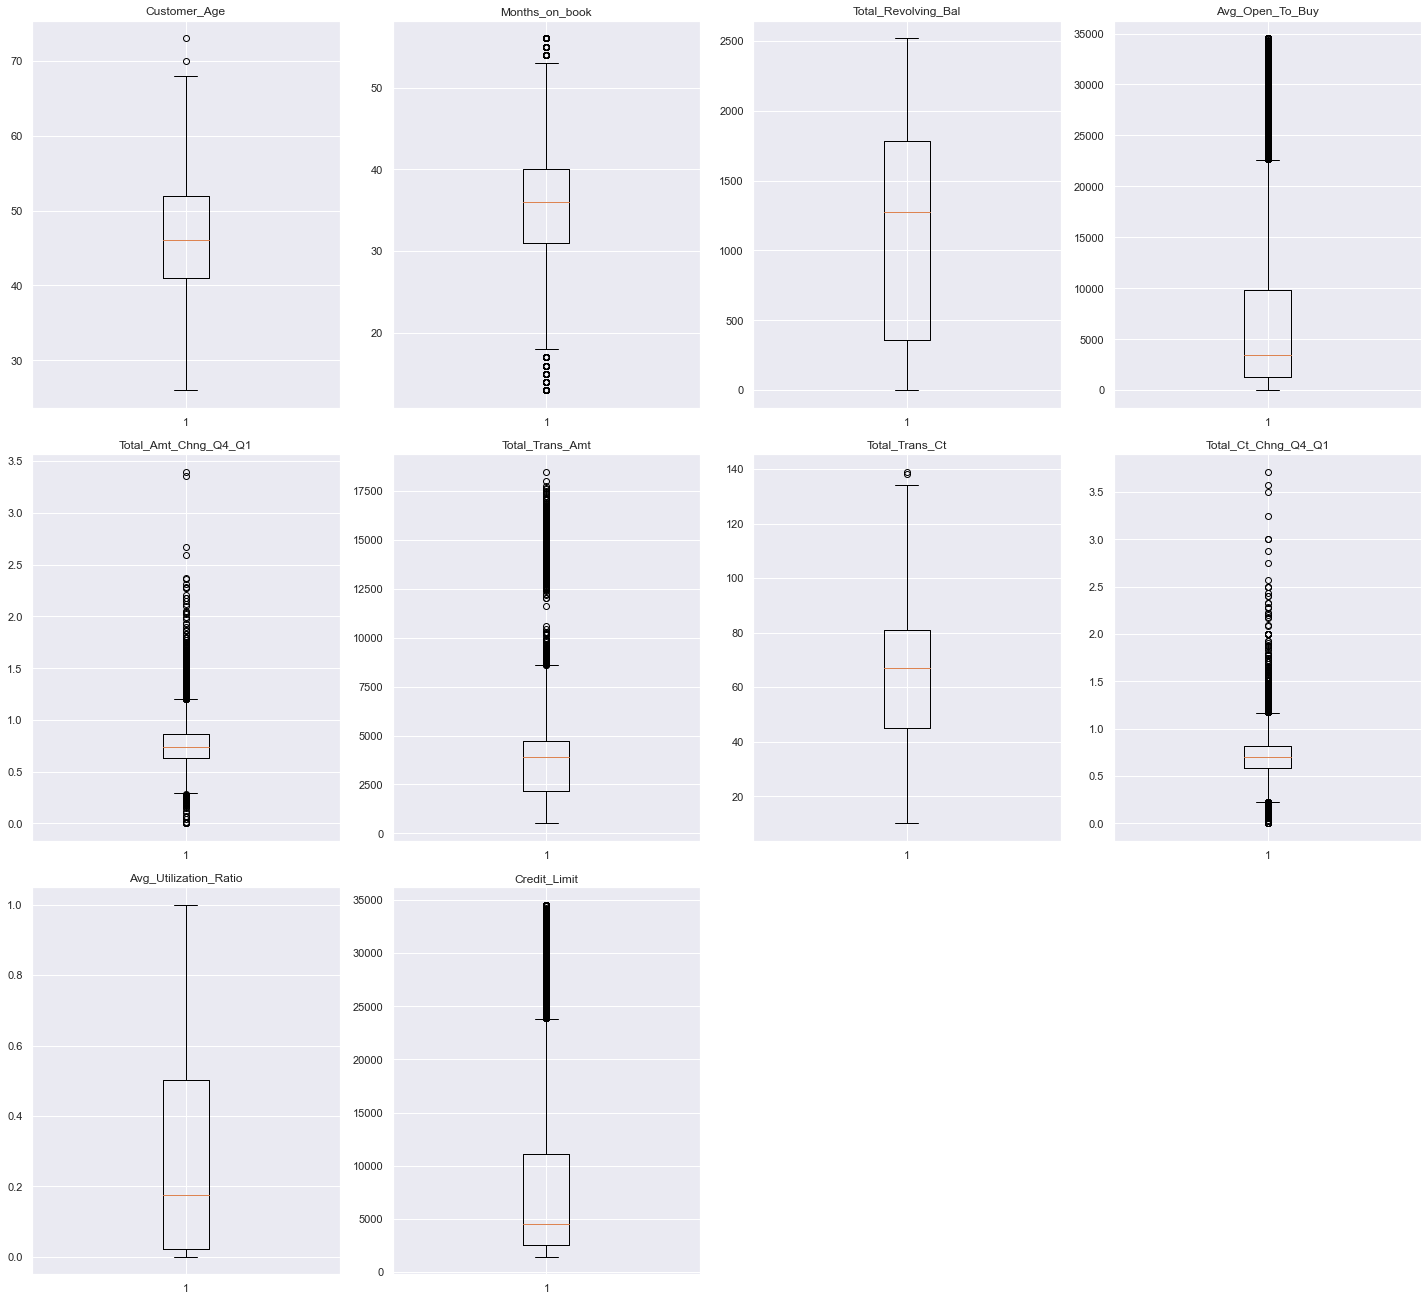

In [52]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(cols):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [53]:
# Check Total_Trans_Ct extreme values
df.sort_values(by=["Total_Trans_Ct"],ascending = False).head(5)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
9324               0            41      M               3         Unknown   
9586               0            56      F               1     High School   
9213               0            32      M               1      Uneducated   
9629               0            42      M               2        Graduate   
9339               0            27      F               0        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9324        Married         $120K +          Blue              33   
9586        Married         Unknown          Blue              49   
9213         Single     $60K - $80K        Silver              36   
9629         Single     $60K - $80K        Silver              36   
9339        Unknown  Less than $40K          Blue              36   

     Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
9324                        2                      4                     3   
9586                        1                      2                     1   
9213                        2                      3                     1   
9629                        3                      3                     2   
9339                        1                      1                     2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9324   34516.00000                  638      33878.00000   
9586   17542.00000                 2517      15025.00000   
9213   33711.00000                 1437      32274.00000   
9629   34516.00000                    0      34516.00000   
9339    4548.00000                 1450       3098.00000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9324               0.72400            13085             139   
9586               0.80000            13939             138   
9213               0.94200            14880             134   
9629               0.77400            12920             132   
9339               0.84400            14330             131   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9324              0.67500                0.01800  
9586              0.79200                0.14300  
9213              0.65400                0.04300  
9629              0.73700                0.00000  
9339              0.63800                0.31900

The total transaction count values of 138 & 139 does not seem to be that extreme compared to the other transaction counts

In [54]:
# Check Customer_Age extreme values
df.sort_values(by=["Customer_Age"],ascending = False).head(5)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
251               0            73      M               0     High School   
254               0            70      M               0     High School   
198               1            68      M               0     High School   
151               0            68      M               1        Graduate   
432               0            67      F               0         Unknown   

    Marital_Status Income_Category Card_Category  Months_on_book  \
251        Married     $40K - $60K          Blue              36   
254        Married  Less than $40K          Blue              56   
198        Married  Less than $40K          Blue              52   
151        Married         Unknown          Blue              56   
432        Married         Unknown          Blue              56   

    Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
251                        5                      3                     2   
254                        3                      2                     3   
198                        1                      3                     2   
151                        5                      2                     3   
432                        4                      3                     3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251    4469.00000                 1125       3344.00000               1.36300   
254    3252.00000                 1495       1757.00000               0.58100   
198    1438.30000                  900        538.30000               0.74300   
151   13860.00000                 1652      12208.00000               1.25500   
432   10509.00000                 2388       8121.00000               0.77700   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34              1.61500   
254             1227              15              0.87500   
198              760              21              0.61500   
151             1910              32              1.90900   
432             1365              34              1.42900   

     Avg_Utilization_Ratio  
251                0.25200  
254                0.46000  
198                0.62600  
151                0.11900  
432                0.22700

The Age of 70 and 73 is also not in the extreme compared to other Age values

In [55]:
# Check Months_on_book extreme values
df.sort_values(by=["Months_on_book"],ascending = False).head(5)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
1760               0            65      F               0        Graduate   
2406               0            65      F               1        Graduate   
177                0            67      F               1        Graduate   
1330               0            61      M               0        Graduate   
1321               0            65      M               0        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
1760        Married  Less than $40K          Blue              56   
2406         Single  Less than $40K          Blue              56   
177         Married  Less than $40K          Blue              56   
1330        Married    $80K - $120K          Blue              56   
1321        Married  Less than $40K          Blue              56   

     Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
1760                        6                      3                     3   
2406                        6                      2                     2   
177                         4                      3                     2   
1330                        4                      2                     4   
1321                        6                      3                     2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
1760    4460.00000                 1262       3198.00000   
2406    4613.00000                 1619       2994.00000   
177     3006.00000                 2517        489.00000   
1330    8420.00000                 1389       7031.00000   
1321    2541.00000                 1616        925.00000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1760               0.89800             1877              41   
2406               0.69700             2328              62   
177                2.05300             1661              32   
1330               0.52200             1114              34   
1321               0.41700             1416              27   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
1760              0.78300                0.28300  
2406              0.72200                0.35100  
177               1.00000                0.83700  
1330              0.54500                0.16500  
1321              0.58800                0.63600

In [56]:
# Check Months_on_book extreme values from lower end
df.sort_values(by=["Months_on_book"],ascending = True).head(5)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
1683               0            26      M               0         College   
3757               0            44      M               3      Uneducated   
9897               1            31      F               1        Graduate   
6383               0            33      F               3      Uneducated   
6756               0            28      F               0         Unknown   

     Marital_Status Income_Category Card_Category  Months_on_book  \
1683         Single     $40K - $60K          Blue              13   
3757       Divorced    $80K - $120K          Blue              13   
9897         Single  Less than $40K          Blue              13   
6383         Single  Less than $40K          Blue              13   
6756         Single  Less than $40K          Blue              13   

     Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
1683                        5                      2                     2   
3757                        4                      2                     3   
9897                        1                      1                     3   
6383                        5                      3                     3   
6756                        3                      2                     2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
1683    2047.00000                 1196        851.00000   
3757   17846.00000                 1568      16278.00000   
9897    4829.00000                    0       4829.00000   
6383    1630.00000                 1008        622.00000   
6756    2387.00000                    0       2387.00000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1683               0.62300             2180              33   
3757               1.06400             3626              77   
9897               0.83600             8286              65   
6383               0.69500             4143              67   
6756               0.63900             4513              66   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
1683              0.94100                0.58400  
3757              0.87800                0.08800  
9897              0.85700                0.00000  
6383              0.59500                0.61800  
6756              0.65000                0.00000

Based on Age these values look accepatable for the column Months_on_Book

In [57]:
# Check Total_Amt_Chng_Q4_Q1 extreme values
df.sort_values(by=["Total_Amt_Chng_Q4_Q1"],ascending = False).head(5)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
12                0            56      M               1         College   
8                 0            37      M               3      Uneducated   
773               0            61      M               0   Post-Graduate   
2                 0            51      M               3        Graduate   
219               0            44      F               3      Uneducated   

    Marital_Status Income_Category Card_Category  Months_on_book  \
12          Single    $80K - $120K          Blue              36   
8           Single     $60K - $80K          Blue              36   
773        Married         Unknown          Blue              53   
2          Married    $80K - $120K          Blue              36   
219       Divorced  Less than $40K        Silver              38   

    Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
12                         3                      6                     0   
8                          5                      2                     0   
773                        6                      2                     3   
2                          4                      1                     0   
219                        4                      1                     3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
12    11751.00000                    0      11751.00000               3.39700   
8     22352.00000                 2517      19835.00000               3.35500   
773   14434.00000                 1927      12507.00000               2.67500   
2      3418.00000                    0       3418.00000               2.59400   
219   11127.00000                 1835       9292.00000               2.36800   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
12              1539              17              3.25000   
8               1350              24              1.18200   
773             1731              32              3.57100   
2               1887              20              2.33300   
219             1546              25              1.27300   

     Avg_Utilization_Ratio  
12                 0.00000  
8                  0.11300  
773                0.13400  
2                  0.00000  
219                0.16500

In [58]:
# Check Total_Trans_Amt extreme values
df.sort_values(by=["Total_Trans_Amt"],ascending = False).head(5)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
9964                0            47      M               4         Unknown   
10073               0            51      M               2        Graduate   
10097               0            31      M               0     High School   
9601                0            45      M               4     High School   
9341                0            48      M               2     High School   

      Marital_Status Income_Category Card_Category  Months_on_book  \
9964         Married     $60K - $80K          Blue              36   
10073        Married     $60K - $80K          Blue              40   
10097         Single     $40K - $60K          Blue              25   
9601          Single     $60K - $80K          Blue              35   
9341         Married  Less than $40K        Silver              36   

      Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
9964                         4                      5                     2   
10073                        3                      3                     3   
10097                        3                      2                     3   
9601                         1                      1                     3   
9341                         2                      2                     2   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9964    10585.00000                 1749       8836.00000   
10073    3750.00000                 1801       1949.00000   
10097    4493.00000                 1388       3105.00000   
9601     8449.00000                 2092       6357.00000   
9341    14581.00000                 2517      12064.00000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9964                0.65500            18484             108   
10073               0.88900            17995             116   
10097               0.79500            17744             104   
9601                0.70900            17634             120   
9341                0.77600            17628             109   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9964               0.58800                0.16500  
10073              0.65700                0.48000  
10097              0.76300                0.30900  
9601               0.66700                0.24800  
9341               0.81700                0.17300

In [59]:
# Check Total_Ct_Chng_Q4_Q1 extreme values
df.sort_values(by=["Total_Ct_Chng_Q4_Q1"],ascending = False).head(5)

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
1                 0            49      F               5        Graduate   
773               0            61      M               0   Post-Graduate   
269               0            54      M               5        Graduate   
12                0            56      M               1         College   
113               0            54      F               0      Uneducated   

    Marital_Status Income_Category Card_Category  Months_on_book  \
1           Single  Less than $40K          Blue              44   
773        Married         Unknown          Blue              53   
269        Married     $60K - $80K          Blue              38   
12          Single    $80K - $120K          Blue              36   
113        Married  Less than $40K          Blue              36   

    Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
1                          6                      1                     2   
773                        6                      2                     3   
269                        3                      3                     3   
12                         3                      6                     0   
113                        2                      2                     2   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1      8256.00000                  864       7392.00000               1.54100   
773   14434.00000                 1927      12507.00000               2.67500   
269    2290.00000                 1434        856.00000               0.92300   
12    11751.00000                    0      11751.00000               3.39700   
113    1494.00000                  706        788.00000               1.67400   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
1               1291              33              3.71400   
773             1731              32              3.57100   
269             1119              18              3.50000   
12              1539              17              3.25000   
113             1305              24              3.00000   

     Avg_Utilization_Ratio  
1                  0.10500  
773                0.13400  
269                0.62600  
12                 0.00000  
113                0.47300

**All outlier values looks acceptable for the dataset and we donot dee anything unsual so we will not be treating them at this point**

#### Let us look at unique values of all the categories

In [60]:
cols_cat=df.select_dtypes(['category'])

In [61]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Dependent_count are :
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
*

We can see Unknown values for the columns Education_Level,Marital_Status & Income_Category which can be treated as missing values

## <a id = "link5"></a> Missing Value Detection & Treatment

In [62]:
df = df.replace({'Unknown': None})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   object  
 5   Marital_Status            9378 non-null   object  
 6   Income_Category           9015 non-null   object  
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [63]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [64]:
pd.DataFrame(data={'% of Missing Values':round(df.isna().sum()/df.isna().count()*100,2)})

% of Missing Values
Attrition_Flag                        0.00000
Customer_Age                          0.00000
Gender                                0.00000
Dependent_count                       0.00000
Education_Level                      15.00000
Marital_Status                        7.40000
Income_Category                      10.98000
Card_Category                         0.00000
Months_on_book                        0.00000
Total_Relationship_Count              0.00000
Months_Inactive_12_mon                0.00000
Contacts_Count_12_mon                 0.00000
Credit_Limit                          0.00000
Total_Revolving_Bal                   0.00000
Avg_Open_To_Buy                       0.00000
Total_Amt_Chng_Q4_Q1                  0.00000
Total_Trans_Amt                       0.00000
Total_Trans_Ct                        0.00000
Total_Ct_Chng_Q4_Q1                   0.00000
Avg_Utilization_Ratio                 0.00000

Education_Level has 15% of the missing values out of the total observations
Marital_Status has 7.4% of the missing values out of the total observations
Income Category has 10.98% of the missing values out of the total observations

### Missing Value Treatment
* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [65]:
imputer = KNNImputer(n_neighbors=5)

In [66]:
reqd_col_for_impute = ['Education_Level','Marital_Status','Income_Category']

In [67]:
df[reqd_col_for_impute].head()

Education_Level Marital_Status Income_Category
0     High School        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3     High School           None  Less than $40K
4      Uneducated        Married     $60K - $80K

In [68]:
data=df.copy()

In [69]:
# we need to pass numerical values for each catergorical column for KNN imputation so we will label encode them
Education_Level = {'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5}
data['Education_Level'] = data['Education_Level'].map(Education_Level).astype('Int32')

Marital_Status = {'Single':0,'Married':1,'Divorced': 2}
data['Marital_Status'] = data['Marital_Status'].map(Marital_Status).astype('Int32')

Income_Category= {'Less than $40K':0, '$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3, '$120K +':4}  
data['Income_Category'] = data['Income_Category'].map(Income_Category).astype('Int32')


In [70]:
data.head()

Attrition_Flag  Customer_Age Gender Dependent_count  Education_Level  \
0               0            45      M               3                1   
1               0            49      F               5                3   
2               0            51      M               3                3   
3               0            40      F               4                1   
4               0            40      M               3                0   

   Marital_Status  Income_Category Card_Category  Months_on_book  \
0               1                2          Blue              39   
1               0                0          Blue              44   
2               1                3          Blue              36   
3            <NA>                0          Blue              34   
4               1                2          Blue              21   

  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                        5                      1                     3   
1                        6                      1                     2   
2                        4                      1                     0   
3                        3                      4                     1   
4                        5                      1                     0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0   12691.00000                  777      11914.00000               1.33500   
1    8256.00000                  864       7392.00000               1.54100   
2    3418.00000                    0       3418.00000               2.59400   
3    3313.00000                 2517        796.00000               1.40500   
4    4716.00000                    0       4716.00000               2.17500   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42              1.62500                0.06100  
1             1291              33              3.71400                0.10500  
2             1887              20              2.33300                0.00000  
3             1171              20              2.33300                0.76000  
4              816              28              2.50000                0.00000

Values are encoded

## <a id = "link6"></a> Split Data

In [71]:
X = data.drop(['Attrition_Flag'],axis=1)
y = data['Attrition_Flag']

In [72]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [73]:
print(data['Attrition_Flag'].head())

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64


## <a id = "link7"></a> Impute Missing Values using KNN Imputer

In [74]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [75]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

In [76]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [77]:
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')

Checking inverse mapped values/categories

In [78]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
3    1897
2    1875
1    1310
4    1097
0     624
5     285
Name: Dependent_count, dtype: int64
******************************
Graduate         2414
High School      1704
College          1264
Uneducated       1032
Post-Graduate     352
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3649
Single      2901
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2692
$40K - $60K       1622
$60K - $80K       1160
$80K - $120K      1110
$120K +            504
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************
3    1644
4    1313
5    1309
6    1306
2     880
1     636
Name: Total_Relationship_Count, dtype: int64
******************************
3    2690
2    2276
1    158

In [79]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

F    1605
M    1434
Name: Gender, dtype: int64
******************************
3    835
2    780
1    528
4    477
0    280
5    139
Name: Dependent_count, dtype: int64
******************************
Graduate         1008
High School       783
College           500
Uneducated        455
Post-Graduate     164
Doctorate         129
Name: Education_Level, dtype: int64
******************************
Married     1618
Single      1211
Divorced     210
Name: Marital_Status, dtype: int64
******************************
Less than $40K    1155
$40K - $60K        683
$60K - $80K        548
$80K - $120K       430
$120K +            223
Name: Income_Category, dtype: int64
******************************
Blue        2817
Silver       182
Gold          35
Platinum       5
Name: Card_Category, dtype: int64
******************************
3    661
4    599
5    582
6    560
2    363
1    274
Name: Total_Relationship_Count, dtype: int64
******************************
3    1156
2    1006
1     646
4     134


Inverse mapping returned original tables

### Encoding categorical variables

In [80]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 47) (3039, 47)


After encoding there are 47 columns

### Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will renounce the credit card services but does not renounce- Loss of resources
2. Predicting a customer will not renounce the credit card services but leaves - Loss of income

#### Which case is more important? 
* Predicting that customer will not renounce the credit card but he does i.e. losing on a potential source of income for the company because that customer will not targeted by the bank to provide services to retain them.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [81]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [82]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## <a id = "link8"></a>Logistic Regression

In [83]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

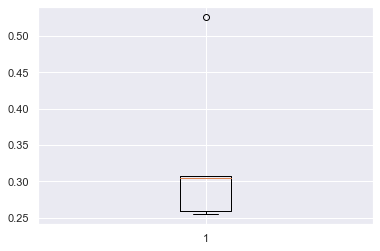

In [84]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Performance on training set varies between 0.27 and .55
Checking performance on test data

Accuracy on training set :  0.8670993227990971
Accuracy on test set :  0.8654162553471537
Recall on training set :  0.32660228270412645
Recall on test set :  0.3155737704918033
Precision on training set :  0.680073126142596
Precision on test set :  0.6724890829694323


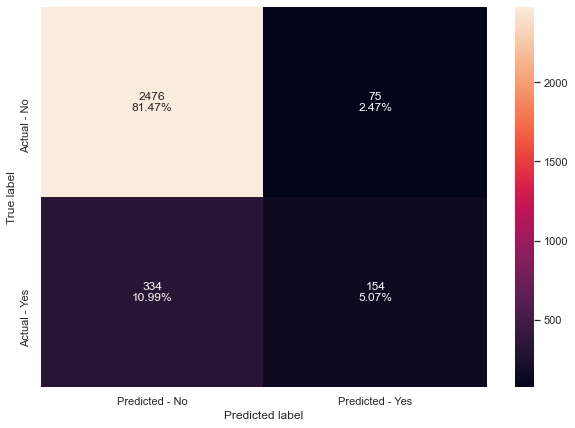

In [85]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

## <a id = "link9"></a> Oversampling train data using SMOTE

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
print("Before UpSampling, counts of label 'Attrited Customer': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'ExistIng Customer': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_sample(X_train, y_train)


print("After UpSampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'ExistIng Customer': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Attrited Customer': 1139
Before UpSampling, counts of label 'ExistIng Customer': 5949 

After UpSampling, counts of label 'Attrited Customer': 5949
After UpSampling, counts of label 'ExistIng Customer': 5949 

After UpSampling, the shape of train_X: (11898, 47)
After UpSampling, the shape of train_y: (11898,) 



#### Logistic Regression on oversampled data

In [88]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

#### Evaluate model performance using KFold and cross_val_score

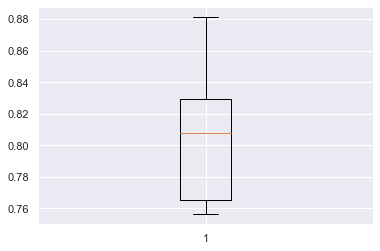

In [89]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.75 to 0.88, which is an improvement from the previous model
* Let's check the performance on the test set.

Accuracy on training set :  0.8820810220205076
Accuracy on test set :  0.8371174728529122
Recall on training set :  0.8739283913262733
Recall on test set :  0.5717213114754098
Precision on training set :  0.8884142173615858
Precision on test set :  0.49380530973451325


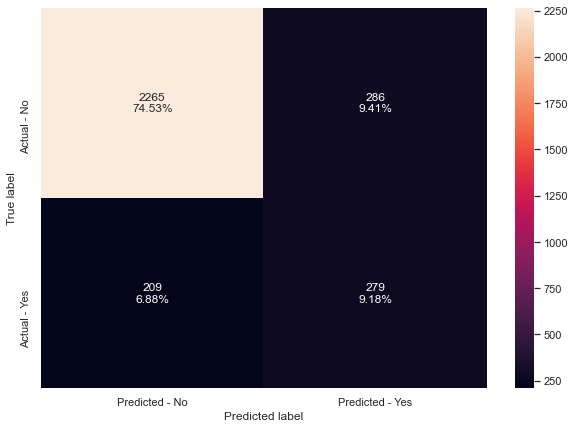

In [90]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Performance on the training set improved but the model is not able to replicate the same for the test set.
* Model is overfitting.
* Lets try:

  a) Regularization to see if overfitting can be reduced

  b) Undersampling the train to handle the imbalance between classes and check the model performance.

## <a id = "link10"></a> Regularization

In [91]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7051605311817112
Accuracy on test set :  0.8045409674234946
Recall on training set :  0.5686670028576232
Recall on test set :  0.5512295081967213
Precision on training set :  0.7821965317919075
Precision on test set :  0.41770186335403725


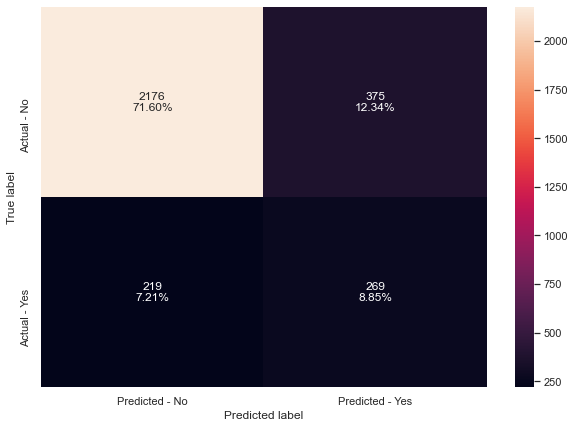

In [92]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* Model seems to perform well on testing data but there still seems to be overfitting
* Let's try undersampling

## <a id = "link11"></a> Undersampling train data using SMOTE

In [93]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_sample(X_train, y_train)

In [94]:
print("Before Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited Customer': 1139
Before Under Sampling, counts of label 'Existing Customer': 5949 

After Under Sampling, counts of label 'Attrited Customer': 1139
After Under Sampling, counts of label 'Existing Customer': 1139 

After Under Sampling, the shape of train_X: (2278, 47)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [95]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

#### Evaluate model performance using KFold and cross_val_score

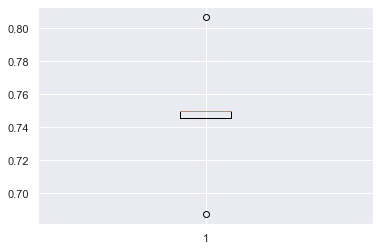

In [96]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0..68 to 0.82, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the test set.

Accuracy on training set :  0.7748024582967515
Accuracy on test set :  0.7769002961500494
Recall on training set :  0.7840210711150132
Recall on test set :  0.7991803278688525
Precision on training set :  0.7698275862068965
Precision on test set :  0.4020618556701031


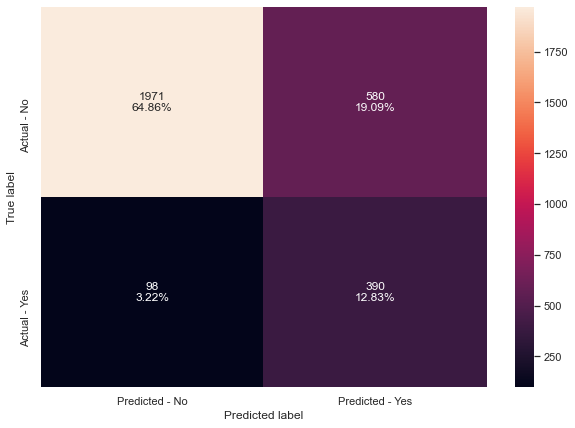

In [97]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Model has given a generalized performance on training and test set.
* Model performance has improved using downsampling - Logistic regression is now able to differentiate well between positive and negative classes.

## <a id = "link12"></a>Model Comparison -Logistic Regression

In [98]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [99]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [100]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [101]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression         0.86710   
1            Logistic Regression on Oversampled data         0.88208   
2  Logistic Regression-Regularized (Oversampled d...         0.70516   
3           Logistic Regression on Undersampled data         0.77480   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0        0.86542       0.32660      0.31557          0.68007         0.67249  
1        0.83712       0.87393      0.57172          0.88841         0.49381  
2        0.80454       0.56867      0.55123          0.78220         0.41770  
3        0.77690       0.78402      0.79918          0.76983         0.40206

* Logistic regression model on undersampled data has given a generalized performance with the highest recall on test data.

### Finding the coefficients

In [102]:
log_odds = log_reg_under.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef']).T

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
coef       0.10907        -0.01157      -0.00029             -0.00056   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
coef          0.00027               0.00599          0.00045        -0.09905   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  ...  \
coef             -0.04060                0.00242  ...   

      Months_Inactive_12_mon_3  Months_Inactive_12_mon_4  \
coef                   0.10031                   0.00926   

      Months_Inactive_12_mon_5  Months_Inactive_12_mon_6  \
coef                  -0.00170                  -0.00138   

      Contacts_Count_12_mon_1  Contacts_Count_12_mon_2  \
coef                 -0.03498                 -0.01489   

      Contacts_Count_12_mon_3  Contacts_Count_12_mon_4  \
coef                  0.07367                  0.02809   

      Contacts_Count_12_mon_5  Contacts_Count_12_mon_6  
coef                  0.01075                  0.01966  

[1 rows x 47 columns]

### Converting coefficients to odds

In [103]:
odds = np.exp(log_reg_under.coef_[0])-1
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.DataFrame(odds, X_train_un.columns, columns=['odds']).T

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
odds       0.11524        -0.01151      -0.00029             -0.00056   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
odds          0.00027               0.00601          0.00045        -0.09430   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
odds             -0.03979                0.00242  -0.02430           -0.01909   

      Dependent_count_2  Dependent_count_3  Dependent_count_4  \
odds            0.00819            0.05432            0.01681   

      Dependent_count_5  Education_Level_Doctorate  Education_Level_Graduate  \
odds            0.00863                    0.01008                   0.01797   

      Education_Level_High School  Education_Level_Post-Graduate  \
odds                      0.00343                        0.00983   

      Education_Level_Uneducated  Marital_Status_Married  \
odds                     0.00806                -0.01122   

      Marital_Status_Single  Income_Category_$40K - $60K  \
odds                0.05590                      0.02040   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
odds                     -0.01603                       0.00035   

      Income_Category_Less than $40K  Card_Category_Gold  \
odds                         0.05642             0.00410   

      Card_Category_Platinum  Card_Category_Silver  \
odds                 0.00206              -0.00002   

      Total_Relationship_Count_2  Total_Relationship_Count_3  \
odds                     0.07416                     0.01240   

      Total_Relationship_Count_4  Total_Relationship_Count_5  \
odds                    -0.02618                    -0.01488   

      Total_Relationship_Count_6  Months_Inactive_12_mon_1  \
odds                    -0.03658                  -0.07588   

      Months_Inactive_12_mon_2  Months_Inactive_12_mon_3  \
odds                   0.02968                   0.10551   

      Months_Inactive_12_mon_4  Months_Inactive_12_mon_5  \
odds                   0.00931                  -0.00170   

      Months_Inactive_12_mon_6  Contacts_Count_12_mon_1  \
odds                  -0.00138                 -0.03437   

      Contacts_Count_12_mon_2  Contacts_Count_12_mon_3  \
odds                 -0.01478                  0.07645   

      Contacts_Count_12_mon_4  Contacts_Count_12_mon_5  \
odds                  0.02848                  0.01081   

      Contacts_Count_12_mon_6  
odds                  0.01986

### Conclusion

* Customer_Age:For a one-unit increase in the Customer_Age, we expect to see about a 11.5% increase in the odds of a customer attriting
* Total_Revolving_Bal: For a one-unit decrease in total_revolving_bal, we expect to see about .056% increase in the odds of a customer attriting
* Total_Trans_Amt:For a one-unit decrease in Total_Trans_Amt, we expect to see about .045% increase in the odds of a customer attriting
* Total_Trans_Ct:For a one-unit decrease in Total_Trans_Ct, we expect to see about 9.4% increase in the odds of a customer attriting
* Total_Relationship_Count_2:For a one-unit increase in in Total_Relationship_Ct_2, we expect to see about 7.4% increase in the odds of a customer attriting
* Months_Inactive_12_mon_3:For a one-unit increase in the Months_inactive_12_mon_3(customers inactive for 3 months in the last 12 months), we expect to see about a 10.5% increase in the odds of a customer attriting

**Similarly we can calculate the odds of a customer attriting based on the coef values of other attributes**

## <a id = "link13"></a> Model Building Bagging and Boosting

In [105]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
               ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
               ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("Bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

RF: 72.2563567509081
GBM: 83.93345699049387
ADB: 83.40482262926038
XGB: 88.23556689079528
DTREE: 77.34987247855322
Bagging: 78.84110054872865


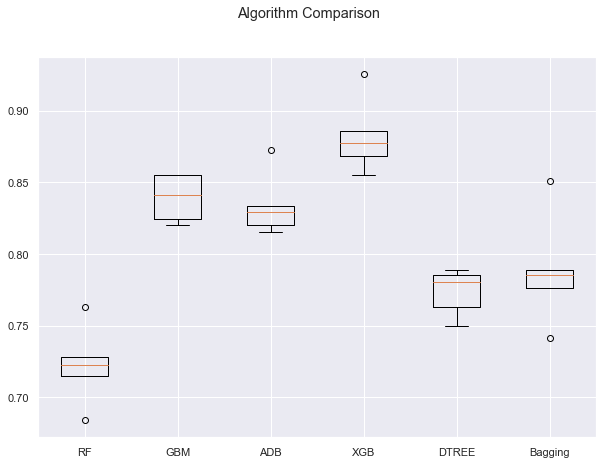

In [106]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

We can see that XGBoost is giving the highest cross validated recall followed by Gradient Boosting and AdaBoost

## <a id = "link14"></a>Hyperparameter Tuning using Grid search & Random search for all models

**We will use pipelines with StandardScalerl and tune the models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline.**

**Creating two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [87]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [88]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### AdaBoost

#### GridSearchCV

In [118]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__n_estimators': 70} 
Score: 0.8806090115155731
Wall time: 10min 8s


In [117]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=70,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=70,
                                    random_state=1))])

Accuracy on training set :  0.9880079006772009
Accuracy on test set :  0.9598552155314248
Recall on training set :  0.9543459174714662
Recall on test set :  0.8360655737704918
Precision on training set :  0.9705357142857143
Precision on test set :  0.9066666666666666


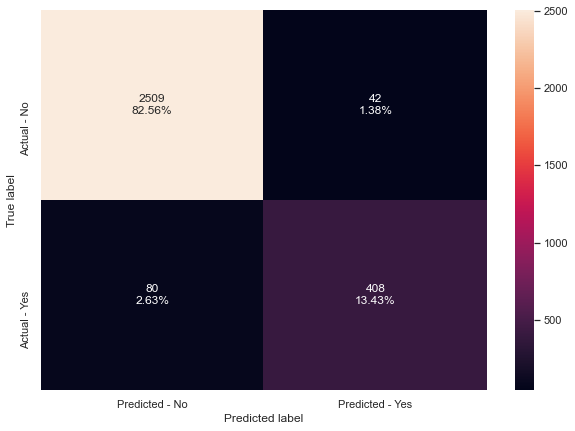

In [118]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

The test recall is similar to the cross validated recall and there is slight overfitting

#### RandomizedSearchCV

In [121]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 100, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8788314398330629:
Wall time: 3min 43s


In [119]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9960496613995485
Accuracy on test set :  0.9585389930898321
Recall on training set :  0.9885864793678666
Recall on test set :  0.8319672131147541
Precision on training set :  0.9868536371603857
Precision on test set :  0.9022222222222223


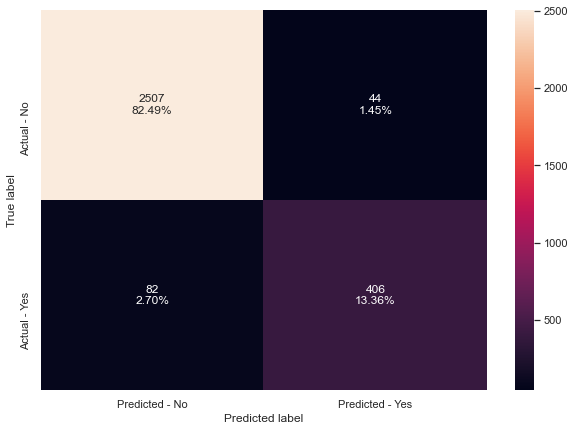

In [120]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- The parameters from random search are slightly different as compared to grid search except the base estimator.
- Test recall is approx same from both the methods also the model is slightly overfitting the data more for parameters given by random search. 

### Random Forest

#### GridSearchCV

In [132]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True))

# Parameter grid to pass in GridSearchCV
param_grid = {
     'randomforestclassifier__max_depth': list(np.arange(5,30,5)),
                'randomforestclassifier__max_features': ['sqrt','log2',None],
                'randomforestclassifier__min_samples_leaf': np.arange(1,15,5),
                'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
                'randomforestclassifier__n_estimators': np.arange(10,110,10)

}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100} 
Score: 0.841077363011052
Wall time: 5h 28min 27s


In [121]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=1,
        max_depth=20,
        max_features=None,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=100,
        oob_score=True,
        bootstrap=True
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, max_features=None,
                                        oob_score=True, random_state=1))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9585389930898321
Recall on training set :  1.0
Recall on test set :  0.819672131147541
Precision on training set :  1.0
Precision on test set :  0.91324200913242


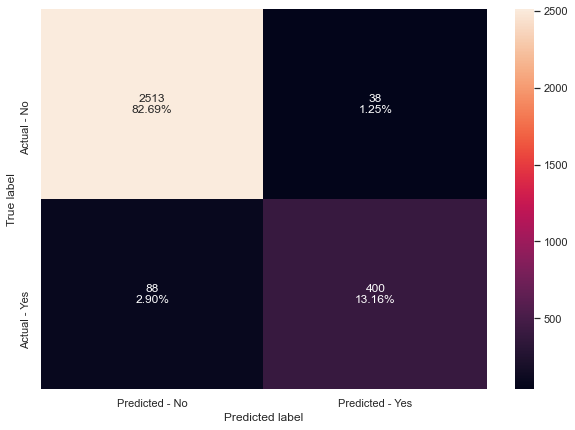

In [122]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

In [ ]:
- The test recall has increased by 9% as compared to the result from cross validation with default parameters.
- The model seems to be a bit overfitting 

### RandomizedSearchCV

In [92]:
%%time 

#Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True))

#Parameter grid to pass in RandomizedSearchCV
param_grid = {
     'randomforestclassifier__max_depth': list(np.arange(5,30,5)),
                'randomforestclassifier__max_features': ['sqrt','log2',None],
                'randomforestclassifier__min_samples_leaf': np.arange(1,15,5),
                'randomforestclassifier__min_samples_split': np.arange(2, 20, 5),
                'randomforestclassifier__n_estimators': np.arange(10,110,10)

}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 30, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': None, 'randomforestclassifier__max_depth': 20} with CV score=0.8314282402040343:
Wall time: 2min 42s


In [123]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=1,
        max_depth=20,
        max_features=None,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=30,
        oob_score=True,
        bootstrap=True
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, max_features=None,
                                        n_estimators=30, oob_score=True,
                                        random_state=1))])

Accuracy on training set :  0.998589164785553
Accuracy on test set :  0.9549193813754524
Recall on training set :  0.9920983318700615
Recall on test set :  0.805327868852459
Precision on training set :  0.9991158267020336
Precision on test set :  0.903448275862069


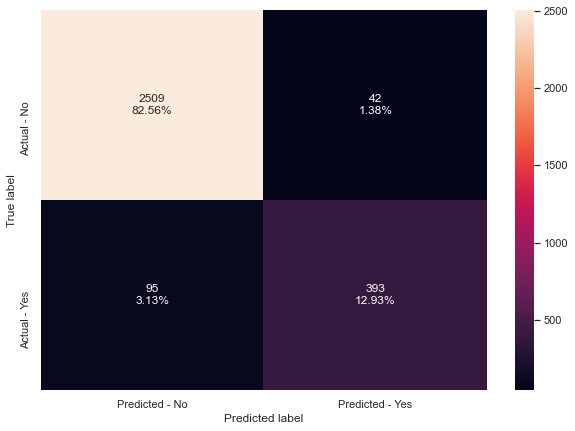

In [124]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- The test recall has increased by 8% as compared to the result from cross validation with default parameters but is less than recall from GridSearch
- The model seems to be a bit overfitting 

### XGBoost

### GridSearchCV

In [131]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9552245150320735:
Wall time: 1h 2min 42s


In [125]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=250,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        gamma=1,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=6, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9528781038374717
Accuracy on test set :  0.9299111549851925
Recall on training set :  0.9982440737489026
Recall on test set :  0.9508196721311475
Precision on training set :  0.773995915588836
Precision on test set :  0.7105666156202144


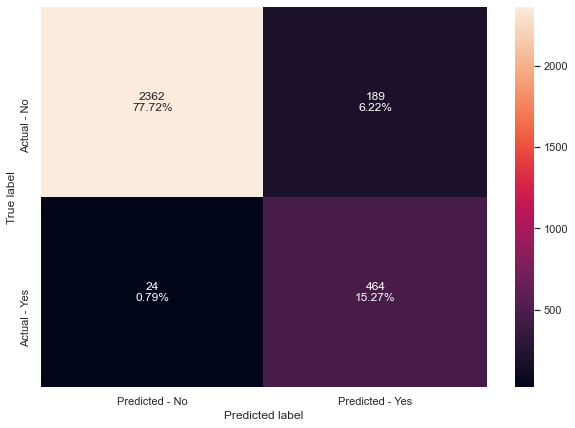

In [126]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased by ~7% as compared to the result from cross validation with default parameters.
- The model is generalizing well on test and training data

### RandomizedSearchCV

In [128]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 1} with CV score=0.9481915140273592:
Wall time: 1min 49s


In [127]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=1,
                subsample=0.9,
                eval_metric='logloss',
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=6, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9461060948081265
Accuracy on test set :  0.9187232642316552
Recall on training set :  0.9982440737489026
Recall on test set :  0.9426229508196722
Precision on training set :  0.7495056031641397
Precision on test set :  0.6774668630338734


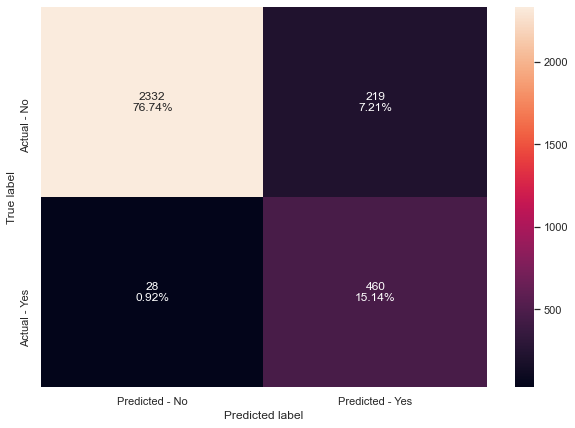

In [128]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Grid search is giving slightly better results than random search and also here the model is slightly overfitting


### Decision Tree Classifier

### GridSearchCV

In [111]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1} with CV score=0.7699938171419739:
Wall time: 6min 1s


In [129]:
# Creating new pipeline with best parameters
dt_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        random_state=1,
        max_depth=4,
        max_leaf_nodes=10,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1,
        
    ),
)

# Fit the model on training data
dt_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                                        min_impurity_decrease=0.0001,
                                        random_state=1))])

Accuracy on training set :  0.9280474040632054
Accuracy on test set :  0.9035867061533399
Recall on training set :  0.8024582967515365
Recall on test set :  0.7336065573770492
Precision on training set :  0.762301918265221
Precision on test set :  0.6871401151631478


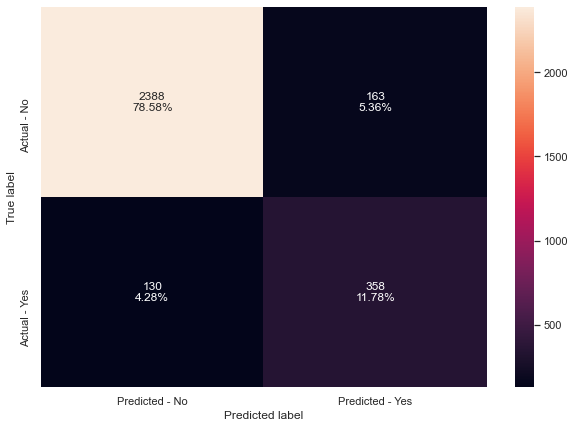

In [130]:
# Calculating different metrics
get_metrics_score(dt_tuned1)

# Creating confusion matrix
make_confusion_matrix(dt_tuned1, y_test)

- The test recall has decreased as compared to the result from cross validation with default parameters.
- The model is slightly overfit

### RandomizedSearchCV

In [97]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid={'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__max_depth': 26} with CV score=0.7620720302960043:
Wall time: 6.27 s


In [131]:
# Creating new pipeline with best parameters
dt_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "DT",
            DecisionTreeClassifier(
                min_samples_leaf=5,
                min_impurity_decrease=0.001,
                max_leaf_nodes=10,
                max_depth=26,
                random_state=1,
              
            ),
        ),
    ]
)
# Fit the model on training data
dt_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(max_depth=26, max_leaf_nodes=10,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=5, random_state=1))])

Accuracy on training set :  0.9280474040632054
Accuracy on test set :  0.9035867061533399
Recall on training set :  0.8024582967515365
Recall on test set :  0.7336065573770492
Precision on training set :  0.762301918265221
Precision on test set :  0.6871401151631478


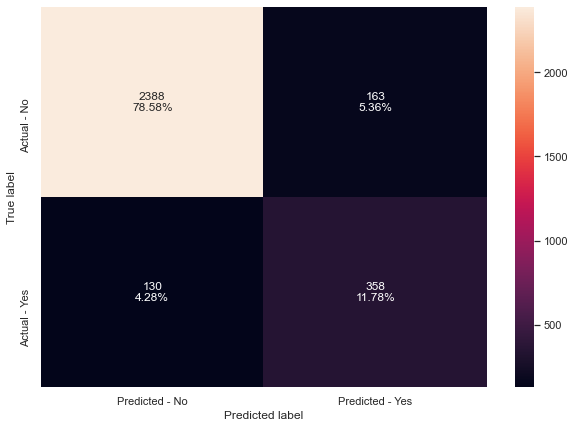

In [132]:
# Calculating different metrics
get_metrics_score(dt_tuned2)

# Creating confusion matrix
make_confusion_matrix(dt_tuned2, y_test)

- The test recall has decreased as compared to the result from cross validation with default parameters.
- The model is slightly overfit

### Bagging Classifier

### GridSearchCV

In [110]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 40} with CV score=0.8357948836849834:
Wall time: 2min 32s


In [133]:
# Creating new pipeline with best parameters
bc_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        random_state=1,
        max_features=0.9,
        max_samples=0.9,
        n_estimators=40,
       
        
    ),
)

# Fit the model on training data
bc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=40, random_state=1))])

Accuracy on training set :  0.9991534988713319
Accuracy on test set :  0.953932214544258
Recall on training set :  0.9947322212467077
Recall on test set :  0.7950819672131147
Precision on training set :  1.0
Precision on test set :  0.9065420560747663


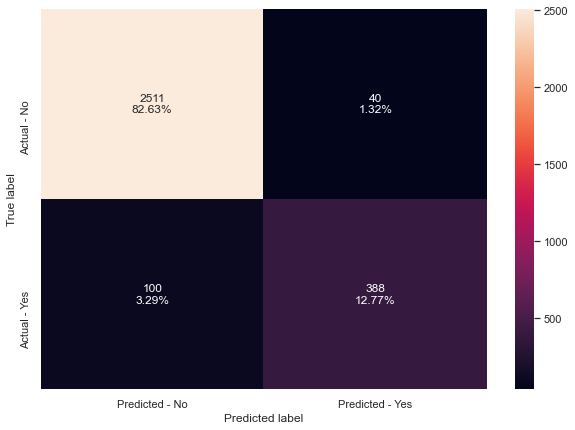

In [134]:
# Calculating different metrics
get_metrics_score(bc_tuned1)

# Creating confusion matrix
make_confusion_matrix(bc_tuned1, y_test)

- The test recall has slightly increased compared to the result from cross validation with default parameters.
- The model is slightly overfit

### RandomizedSearchCV

In [107]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid={'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 40, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.9} with CV score=0.8357948836849834:
Wall time: 1min 28s


In [135]:
# Creating new pipeline with best parameters
bc_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "Bagging",
            BaggingClassifier(
                n_estimators=40,
                max_samples=0.9,
                max_features=0.9,
                random_state=1,
              
            ),
        ),
    ]
)
# Fit the model on training data
bc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Bagging',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=40, random_state=1))])

Accuracy on training set :  0.9991534988713319
Accuracy on test set :  0.953932214544258
Recall on training set :  0.9947322212467077
Recall on test set :  0.7950819672131147
Precision on training set :  1.0
Precision on test set :  0.9065420560747663


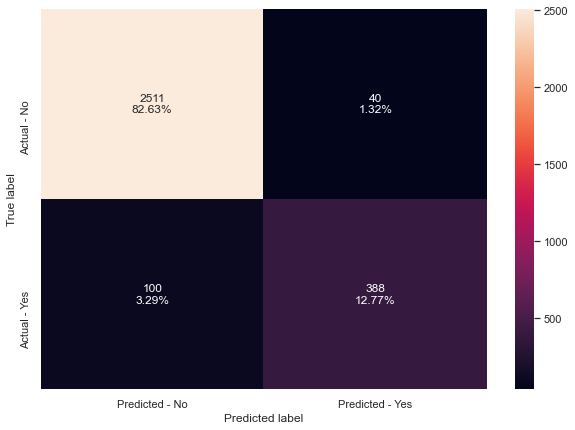

In [136]:
# Calculating different metrics
get_metrics_score(bc_tuned2)

# Creating confusion matrix
make_confusion_matrix(bc_tuned2, y_test)

- The test recall has slightly increased compared to the result from cross validation with default parameters.
- The model is slightly overfit

## <a id = "link15"></a> Comparing all models for Performance and Time Taken

In [137]:
# defining list of models
models = [abc_tuned1, abc_tuned2, rf_tuned1,rf_tuned2,xgb_tuned1,xgb_tuned2,dt_tuned1,dt_tuned2,bc_tuned1,bc_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [141]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "ADA Boost with GridSearchCV",
            "ADA Boost with RandomizedSearchCV",
            "Random Forest with GridSearchCV",
            "Random Forest with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Bagging Classfier with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Time Taken":['10min 8s','3min 43s','5h 28min 27s','2min 42s','1h 2min 42s','1min 49s','6min 1s','6.27s','2min 32s','1min 28s']
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
4                  XGBoost with GridSearchCV         0.95288        0.92991   
5            XGBoost with RandomizedSearchCV         0.94611        0.91872   
0                ADA Boost with GridSearchCV         0.98801        0.95986   
1          ADA Boost with RandomizedSearchCV         0.99605        0.95854   
2            Random Forest with GridSearchCV         1.00000        0.95854   
3      Random Forest with RandomizedSearchCV         0.99859        0.95492   
8       Bagging Classifier with GridSearchCV         0.99915        0.95393   
9  Bagging Classfier with RandomizedSearchCV         0.99915        0.95393   
6            Decision Tree with GridSearchCV         0.92805        0.90359   
7      Decision Tree with RandomizedSearchCV         0.92805        0.90359   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision    Time Taken  
4       0.99824      0.95082          0.77400         0.71057   1h 2min 42s  
5       0.99824      0.94262          0.74951         0.67747      1min 49s  
0       0.95435      0.83607          0.97054         0.90667      10min 8s  
1       0.98859      0.83197          0.98685         0.90222      3min 43s  
2       1.00000      0.81967          1.00000         0.91324  5h 28min 27s  
3       0.99210      0.80533          0.99912         0.90345      2min 42s  
8       0.99473      0.79508          1.00000         0.90654      2min 32s  
9       0.99473      0.79508          1.00000         0.90654      1min 28s  
6       0.80246      0.73361          0.76230         0.68714       6min 1s  
7       0.80246      0.73361          0.76230         0.68714         6.27s

- The XGBoost model tuned using grid search is giving the best test recall of 0.95 and it has comparable Accuracy and Precision as well but based on the time taken XGBoost model with Randomized search is giving close performance with very good timing
- Also we can see that the Random Forest with Grid Search has taken the highest time for completion with around 5 and half hours.The least amount of time has been taken by the Decision Tree model with Randomized Search with just 6.27 secs. 
- Let's see the feature importance from the tuned xgboost model

## <a id = "link16"></a> Feature Importance-XGBoost

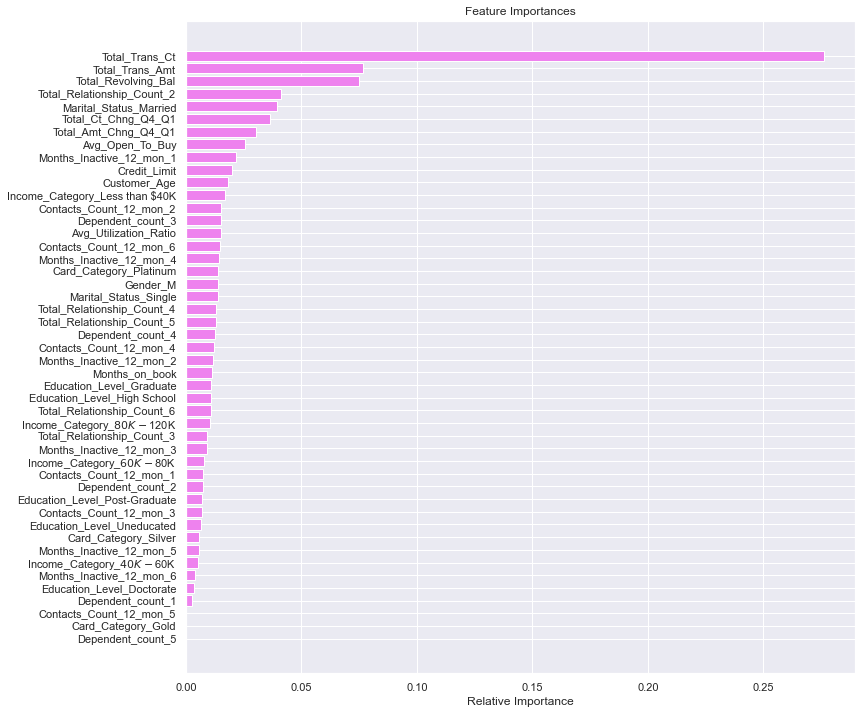

In [142]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Total_Tran_Ct is the most important feature followed by Total_Trans_Amt & Total_Revolving_Bal

## <a id = "link17"></a>Actionable Insights & Business Recommendations

* The Bank should focus on customers who have less Total_Trans_Ct in the last 12 months as these are customers who have high chances of attriting.Obviously since these customers donot make much transactions they indicate that they donot use the credit cards much.Bank can provide some offers for these customers to get them using thier credit cards
* Similarly customers who have done less transaction in the past 12 months and those who have low revolving balance in thier account have higher chances of attrition and thr bank must focus on such customers and provide offers to retain them 
* Also customers who hold 2 products with the bank are the ones showing higher attrition.Bank can encourage such customers to get enrolled for more products which will help retain such customers
* Change in transaction amount from Q4 over Q1 (Total_Amt_Chng_Q4_Q1) is less for attrited customers than existing customers.Customers have to encouraged to spend more.Offers can be provided.
* Customers who have been inactive for a month show high chances of attrition.Bank should focus on such customers as well.
* Other factors to focus are customers having income less than 40K, customers who have had high number of contacts with the bank in the last 12 months.

